# House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

## 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [156]:
housing_data=pd.read_csv("train.csv")

In [157]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [158]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [159]:
housing_data.shape

(1460, 81)

### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes and their allowed values;

#### Univariate analysis

<b>Categorical data understanding via value counts of different category</b>

In [160]:
#        MSSubClass: This attribute Identifies the type of dwelling involved in the sale.


#        20	1-STORY 1946 & NEWER ALL STYLES
#        30	1-STORY 1945 & OLDER
#        40	1-STORY W/FINISHED ATTIC ALL AGES
#        45	1-1/2 STORY - UNFINISHED ALL AGES
#        50	1-1/2 STORY FINISHED ALL AGES
#        60	2-STORY 1946 & NEWER
#        70	2-STORY 1945 & OLDER
#        75	2-1/2 STORY ALL AGES
#        80	SPLIT OR MULTI-LEVEL
#        85	SPLIT FOYER
#        90	DUPLEX - ALL STYLES AND AGES
#       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#       150	1-1/2 STORY PUD - ALL AGES
#       160	2-STORY PUD - 1946 & NEWER
#       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
housing_data['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [161]:
#       MSZoning: This attribute Identifies the general zoning classification of the sale.

#       A	Agriculture
#       C	Commercial
#       FV	Floating Village Residential
#       I	Industrial
#       RH	Residential High Density
#       RL	Residential Low Density
#       RP	Residential Low Density Park 
#       RM	Residential Medium Density
housing_data['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [162]:
#       Street: This attribute Identifies Type of road access to property

#       Grvl	Gravel
#       Pave	Paved
housing_data['Street'].astype('category').value_counts()


Pave    1454
Grvl       6
Name: Street, dtype: int64

In [163]:
#       Alley: This attribute Identifies Type of alley access to property

#       Grvl	Gravel
#       Pave	Paved
#       NA 	No alley access
housing_data['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [164]:
#       LotShape: This attribute Identifies General shape of property

#       Reg	Regular
#       IR1	Slightly irregular
#       IR2	Moderately Irregular
#       IR3	Irregular
housing_data['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [165]:
#       LandContour: This attribute Identifies Flatness of the property

#       Lvl	Near Flat/Level	
#       Bnk	Banked - Quick and significant rise from street grade to building
#       HLS	Hillside - Significant slope from side to side
#       Low	Depression
housing_data['LandContour'].astype('category').value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [166]:
#        Utilities: This attribute Identifies Type of utilities available

#       AllPub	All public Utilities (E,G,W,& S)
#       NoSewr	Electricity, Gas, and Water (Septic Tank)
#       NoSeWa	Electricity and Gas Only
#       ELO	Electricity only

housing_data['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [167]:
#       LotConfig: This attribute Identifies Lot configuration

#       Inside	Inside lot
#       Corner	Corner lot
#       CulDSac	Cul-de-sac
#      FR2	Frontage on 2 sides of property
#       FR3	Frontage on 3 sides of property

housing_data['LotConfig'].astype('category').value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [168]:
#       LandSlope: This attribute Identifies Slope of property

#       Gtl	Gentle slope
#       Mod	Moderate Slope	
#       Sev	Severe Slope
housing_data['LandSlope'].astype('category').value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [169]:
#       Neighborhood: This attribute Identifies Physical locations within Ames city limits

#       Blmngtn	Bloomington Heights
#       Blueste	Bluestem
#       BrDale	Briardale
#       BrkSide	Brookside
#       ClearCr	Clear Creek
#       CollgCr	College Creek
#       Crawfor	Crawford
#       Edwards	Edwards
#       Gilbert	Gilbert
#       IDOTRR	Iowa DOT and Rail Road
#       MeadowV	Meadow Village
#       Mitchel	Mitchell
#       Names	North Ames
#       NoRidge	Northridge
#       NPkVill	Northpark Villa
#       NridgHt	Northridge Heights
#       NWAmes	Northwest Ames
#       OldTown	Old Town
#       SWISU	South & West of Iowa State University
#       Sawyer	Sawyer
#       SawyerW	Sawyer West
#       Somerst	Somerset
#       StoneBr	Stone Brook
#       Timber	Timberland
#       Veenker	Veenker

housing_data['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [170]:
#       Condition1: This attribute Identifies Proximity to various conditions

#       Artery	Adjacent to arterial street
#       Feedr	Adjacent to feeder street	
#       Norm	Normal	
#       RRNn	Within 200' of North-South Railroad
#       RRAn	Adjacent to North-South Railroad
#       PosN	Near positive off-site feature--park, greenbelt, etc.
#       PosA	Adjacent to postive off-site feature
#       RRNe	Within 200' of East-West Railroad
#       RRAe	Adjacent to East-West Railroad
housing_data['Condition1'].astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [171]:
#       Condition2: This attribute Identifies Proximity to various conditions (if more than one is present)
#              
#       Artery Adjacent to arterial street
#       Feedr  Adjacent to feeder street   
#       Norm   Normal 
#       RRNn   Within 200' of North-South Railroad
#       RRAn   Adjacent to North-South Railroad
#       PosN   Near positive off-site feature--park, greenbelt, etc.
#       PosA   Adjacent to postive off-site feature
#       RRNe   Within 200' of East-West Railroad
#       RRAe   Adjacent to East-West Railroad
housing_data['Condition2'].astype('category').value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [172]:

#       BldgType: This attribute Identifies Type of dwelling
#              
#       1Fam   Single-family Detached      
#       2FmCon Two-family Conversion; originally built as one-family dwelling
#       Duplx  Duplex
#       TwnhsE Townhouse End Unit
#       TwnhsI Townhouse Inside Unit
housing_data['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [173]:
#       HouseStyle: This attribute Identifies Style of dwelling
#       
#       1Story One story
#       1.5Fin One and one-half story: 2nd level finished
#       1.5Unf One and one-half story: 2nd level unfinished
#       2Story Two story
#       2.5Fin Two and one-half story: 2nd level finished
#       2.5Unf Two and one-half story: 2nd level unfinished
#       SFoyer Split Foyer
#       SLvl   Split Level
housing_data['HouseStyle'].astype('category').value_counts()


1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [174]:
#       OverallQual: This attribute Rates the overall material and finish of the house

#       10     Very Excellent
#       9      Excellent
#       8      Very Good
#       7      Good
#       6      Above Average
#       5      Average
#       4      Below Average
#       3      Fair
#       2      Poor
#       1      Very Poor
housing_data['OverallQual'].astype('category').value_counts()


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [175]:
#       OverallCond: This attribute Rates the overall condition of the house

#       10     Very Excellent
#       9      Excellent
#       8      Very Good
#       7      Good
#       6      Above Average 
#       5      Average
#       4      Below Average 
#       3      Fair
#       2      Poor
#       1      Very Poor
housing_data['OverallCond'].astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [176]:
#       RoofStyle: This attribute Identifies Type of roof

#       Flat   Flat
#       Gable  Gable
#       Gambrel       Gabrel (Barn)
#       Hip    Hip
#       Mansard       Mansard
#       Shed   Shed
housing_data['RoofStyle'].astype('category').value_counts()       


Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [177]:
#       RoofMatl: This attribute Identifies Roof material

#       ClyTile       Clay or Tile
#       CompShg       Standard (Composite) Shingle
#       Membran       Membrane
#       Metal  Metal
#       Roll   Roll
#       Tar&Grv       Gravel & Tar
#       WdShake       Wood Shakes
#       WdShngl       Wood Shingles
housing_data['RoofMatl'].astype('category').value_counts() 


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64

In [178]:
#       Exterior1st: This attribute Identifies Exterior covering on house

#       AsbShng       Asbestos Shingles
#       AsphShn       Asphalt Shingles
#       BrkComm       Brick Common
#       BrkFace       Brick Face
#       CBlock Cinder Block
#       CemntBd       Cement Board
#       HdBoard       Hard Board
#       ImStucc       Imitation Stucco
#       MetalSd       Metal Siding
#       Other  Other
#       Plywood       Plywood
#       PreCast       PreCast       
#       Stone  Stone
#       Stucco Stucco
#       VinylSd       Vinyl Siding
#       Wd Sdng       Wood Siding
#       WdShing       Wood Shingles
housing_data['Exterior1st'].astype('category').value_counts()


VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [179]:
#       Exterior2nd: Exterior covering on house (if more than one material)

#       AsbShng       Asbestos Shingles
#       AsphShn       Asphalt Shingles
#       BrkComm       Brick Common
#       BrkFace       Brick Face
#       CBlock Cinder Block
#       CemntBd       Cement Board
#       HdBoard       Hard Board
#       ImStucc       Imitation Stucco
#       MetalSd       Metal Siding
#       Other  Other
#       Plywood       Plywood
#       PreCast       PreCast
#       Stone  Stone
#       Stucco Stucco
#       VinylSd       Vinyl Siding
#       Wd Sdng       Wood Siding
#       WdShing       Wood Shingles
housing_data['Exterior2nd'].astype('category').value_counts()


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [180]:
#       MasVnrType: This attribute Identifies Masonry veneer type

#       BrkCmn Brick Common
#       BrkFace       Brick Face
#       CBlock Cinder Block
#       None   None
#       Stone  Stone
housing_data['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [181]:
#      ExterQual: This attribute Evaluates the quality of the material on the exterior 
#              
#       Ex     Excellent
#       Gd     Good
#       TA     Average/Typical
#       Fa     Fair
#       Po     Poor
housing_data['ExterQual'].astype('category').value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [182]:
#       ExterCond: This attribute Evaluates the present condition of the material on the exterior
#              
#       Ex     Excellent
#       Gd     Good
#       TA     Average/Typical
#       Fa     Fair
#       Po     Poor
housing_data['ExterCond'].astype('category').value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [183]:
#       Foundation: This attribute Identifies Type of foundation
#              
#       BrkTil Brick & Tile
#       CBlock Cinder Block
#       PConc  Poured Contrete      
#       Slab   Slab
#       Stone  Stone
housing_data['Foundation'].astype('category').value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [184]:
#       BsmtQual: This attribute Evaluates the height of the basement

#       Ex     Excellent (100+ inches)     
#       Gd     Good (90-99 inches)
#       TA     Typical (80-89 inches)
#       Fa     Fair (70-79 inches)
#       Po     Poor (<70 inches
#       NA     No Basement
housing_data['BsmtQual'].astype('category').value_counts()     

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [185]:
#       BsmtCond: This attribute Evaluates the general condition of the basement

#       Ex     Excellent
#       Gd     Good
#       TA     Typical - slight dampness allowed
#       Fa     Fair - dampness or some cracking or settling
#       Po     Poor - Severe cracking, settling, or wetness
#       NA     No Basement
housing_data['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [186]:
#       BsmtExposure: This attribute Refers to walkout or garden level walls

#       Gd     Good Exposure
#       Av     Average Exposure (split levels or foyers typically score average or above)   
#       Mn     Mimimum Exposure
#       No     No Exposure
#       NA     No Basement
housing_data['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [187]:
#       BsmtFinType1: This attribute Identifies Rating of basement finished area

#       GLQ    Good Living Quarters
#       ALQ    Average Living Quarters
#       BLQ    Below Average Living Quarters      
#       Rec    Average Rec Room
#       LwQ    Low Quality
#       Unf    Unfinshed
#       NA     No Basement
housing_data['BsmtFinType1'].astype('category').value_counts()


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [188]:
#       BsmtFinType2: This attribute Identifies Rating of basement finished area (if multiple types)

#       GLQ    Good Living Quarters
#       ALQ    Average Living Quarters
#       BLQ    Below Average Living Quarters      
#       Rec    Average Rec Room
#       LwQ    Low Quality
#       Unf    Unfinshed
#       NA     No Basement
housing_data['BsmtFinType2'].astype('category').value_counts()


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [189]:
#       Heating: This attribute Identifies Type of heating
#              
#       Floor  Floor Furnace
#       GasA   Gas forced warm air furnace
#       GasW   Gas hot water or steam heat
#       Grav   Gravity furnace      
#       OthW   Hot water or steam heat other than gas
#       Wall   Wall furnace
housing_data['Heating'].astype('category').value_counts()    


GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [190]:
#       HeatingQC: This attribute Identifies Heating quality and condition

#       Ex     Excellent
#       Gd     Good
#       TA     Average/Typical
#       Fa     Fair
#       Po     Poor
housing_data['HeatingQC'].astype('category').value_counts()      


Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [191]:
#       CentralAir: This attribute Identifies if Central air conditioning is present or not

#       N      No
#       Y      Yes
housing_data['CentralAir'].astype('category').value_counts()      


Y    1365
N      95
Name: CentralAir, dtype: int64

In [192]:
#       Electrical: This attribute Identifies type of Electrical system

#       SBrkr  Standard Circuit Breakers & Romex
#       FuseA  Fuse Box over 60 AMP and all Romex wiring (Average)     
#       FuseF  60 AMP Fuse Box and mostly Romex wiring (Fair)
#       FuseP  60 AMP Fuse Box and mostly knob & tube wiring (poor)
#       Mix    Mixed
housing_data['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [193]:
#       Functional: This attribute Identifies Home functionality (Assume typical unless deductions are warranted)

#       Typ    Typical Functionality
#       Min1   Minor Deductions 1
#       Min2   Minor Deductions 2
#       Mod    Moderate Deductions
#       Maj1   Major Deductions 1
#       Maj2   Major Deductions 2
#       Sev    Severely Damaged
#       Sal    Salvage only
housing_data['Functional'].astype('category').value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [194]:
#       FireplaceQu: This attribute Identifies Fireplace quality

#       Ex     Excellent - Exceptional Masonry Fireplace
#       Gd     Good - Masonry Fireplace in main level
#       TA     Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#       Fa     Fair - Prefabricated Fireplace in basement
#       Po     Poor - Ben Franklin Stove
#       NA     No Fireplace
housing_data['FireplaceQu'].astype('category').value_counts()


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [195]:
#       GarageType: This attribute Identifies Garage location
#              
#       2Types More than one type of garage
#       Attchd Attached to home
#       Basment       Basement Garage
#       BuiltIn       Built-In (Garage part of house - typically has room above garage)
#       CarPort       Car Port
#       Detchd Detached from home
#       NA     No Garage
housing_data['Electrical'].astype('category').value_counts() 


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [196]:
#       GarageFinish: This attribute Identifies Interior finish of the garage

#       Fin    Finished
#       RFn    Rough Finished       
#       Unf    Unfinished
#       NA     No Garage
housing_data['GarageType'].astype('category').value_counts()


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [197]:
#       GarageQual: This attribute Identifies Garage quality

#       Ex     Excellent
#       Gd     Good
#       TA     Typical/Average
#       Fa     Fair
#       Po     Poor
#       NA     No Garage
housing_data['GarageQual'].astype('category').value_counts()   


TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [198]:
#       PavedDrive: This attribute Identifies Paved driveway

#       Y      Paved 
#       P      Partial Pavement
#       N      Dirt/Gravel
housing_data['PavedDrive'].astype('category').value_counts()


Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [199]:
#       PoolQC: This attribute Identifies Pool quality
#              
#       Ex     Excellent
#       Gd     Good
#       TA     Average/Typical
#       Fa     Fair
#       NA     No Pool
housing_data['PoolQC'].astype('category').value_counts()  


Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [200]:
#       Fence: This attribute Identifies Fence quality
#              
#       GdPrv  Good Privacy
#       MnPrv  Minimum Privacy
#       GdWo   Good Wood
#       MnWw   Minimum Wood/Wire
#       NA     No Fence
housing_data['Fence'].astype('category').value_counts()


MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [201]:
#       MiscFeature: This attribute Identifies Miscellaneous feature not covered in other categories
#              
#       Elev   Elevator
#       Gar2   2nd Garage (if not described in garage section)
#       Othr   Other
#       Shed   Shed (over 100 SF)
#       TenC   Tennis Court
#       NA     None
housing_data['MiscFeature'].astype('category').value_counts()


Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [202]:
#       SaleType: This attribute Identifies Type of sale
#              
#       WD     Warranty Deed - Conventional
#       CWD    Warranty Deed - Cash
#       VWD    Warranty Deed - VA Loan
#       New    Home just constructed and sold
#       COD    Court Officer Deed/Estate
#       Con    Contract 15% Down payment regular terms
#       ConLw  Contract Low Down payment and low interest
#       ConLI  Contract Low Interest
#       ConLD  Contract Low Down
#       Oth    Other
housing_data['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [203]:
#       SaleCondition: This attribute Identifies Condition of sale

#       Normal Normal Sale
#       Abnorml       Abnormal Sale -  trade, foreclosure, short sale
#       AdjLand       Adjoining Land Purchase
#       Alloca Allocation - two linked properties with separate deeds, typically condo with a garage unit 
#       Family Sale between family members
#       Partial       Home was not completed when last assessed (associated with New Homes)
housing_data['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

<b>Numerical data understanding via histogram and value_counts(if necessary like when most values are 0)</b>

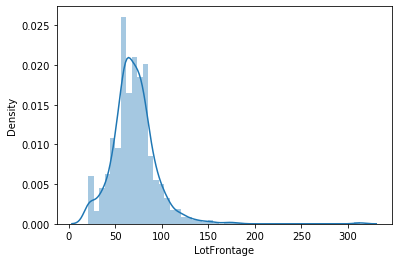

In [204]:
# LotFrontage: This attribute Identifies Linear feet of street connected to property
sns.distplot(housing_data['LotFrontage'])
plt.show()

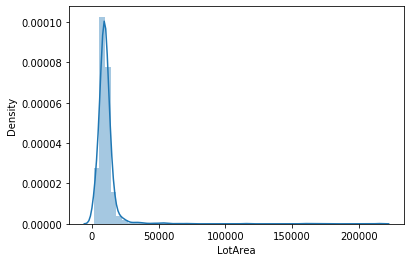

In [205]:
#LotArea: This attribute Identifies Lot size in square feet
sns.distplot(housing_data['LotArea'])
plt.show()


In [206]:

              
#YearBuilt: This attribute Identifies Original construction date
# This is uncessary column for our analysis since we don't get any relevant information from construction date


#YearRemodAdd: This attribute Identifies Remodel date (same as construction date if no remodeling or additions)
# This is uncessary column for our analysis since we don't get any relevant information from Remodel date

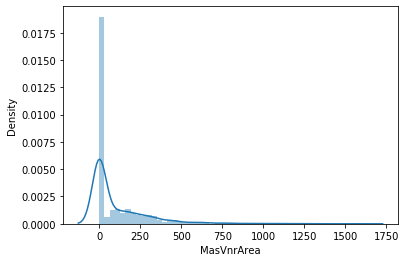

In [207]:
#MasVnrArea: This attribute Identifies Masonry veneer area in square feet
sns.distplot(housing_data['MasVnrArea'])
plt.show()

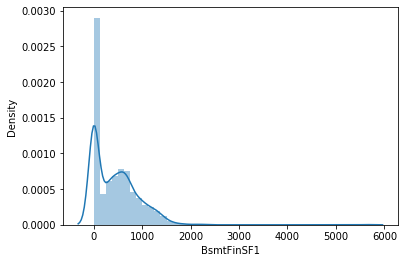

In [208]:
#BsmtFinSF1: This attribute Identifies Type 1 finished square feet
sns.distplot(housing_data['BsmtFinSF1'])
plt.show()

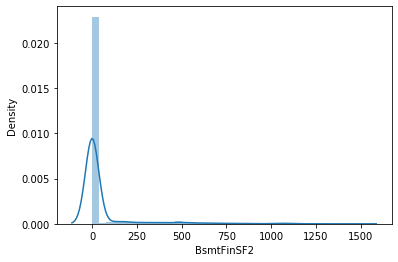

0       1293
180        5
374        3
551        2
93         2
468        2
147        2
480        2
539        2
712        2
117        2
279        2
96         2
391        2
287        2
290        2
294        2
64         2
41         2
182        2
469        2
228        1
208        1
210        1
211        1
202        1
215        1
193        1
219        1
184        1
258        1
230        1
232        1
239        1
240        1
264        1
273        1
276        1
306        1
311        1
324        1
334        1
181        1
1085       1
1120       1
125        1
28         1
32         1
35         1
40         1
68         1
80         1
81         1
105        1
106        1
108        1
110        1
119        1
121        1
123        1
127        1
177        1
128        1
132        1
139        1
144        1
149        1
150        1
163        1
165        1
168        1
169        1
173        1
174        1
344        1
175        1
336        1

In [209]:
#BsmtFinSF2: This attribute Identifies Type 2 finished square feet
sns.distplot(housing_data['BsmtFinSF2'])
plt.show()
housing_data['BsmtFinSF2'].value_counts()

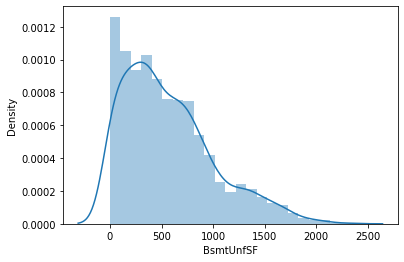

In [210]:
#BsmtUnfSF: This attribute Identifies Unfinished square feet of basement area
sns.distplot(housing_data['BsmtUnfSF'])
plt.show()



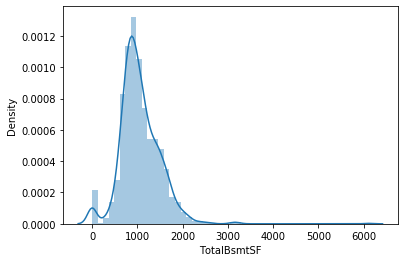

In [211]:
#TotalBsmtSF: This attribute Identifies Total square feet of basement area
sns.distplot(housing_data['TotalBsmtSF'])
plt.show()

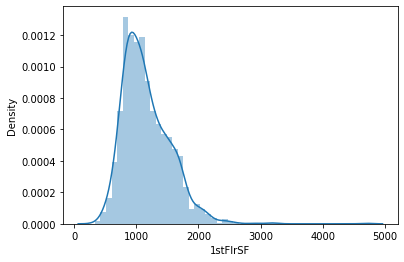

In [212]:
#1stFlrSF: This attribute Identifies First Floor square feet
sns.distplot(housing_data['1stFlrSF'])
plt.show()

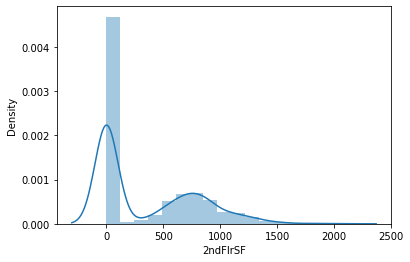

In [213]:
#2ndFlrSF: This attribute Identifies Second floor square feet
sns.distplot(housing_data['2ndFlrSF'])
plt.show()

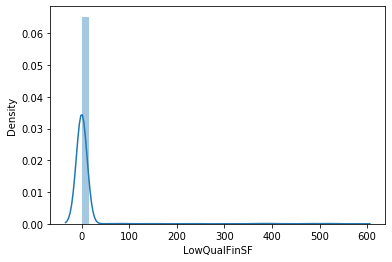

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

In [214]:
#LowQualFinSF: Low quality finished square feet (all floors)
sns.distplot(housing_data['LowQualFinSF'])
plt.show()
housing_data['LowQualFinSF'].value_counts()

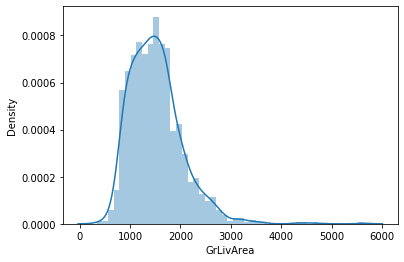

In [215]:
#GrLivArea: This attribute Identifies Above grade (ground) living area square feet
sns.distplot(housing_data['GrLivArea'])
plt.show()

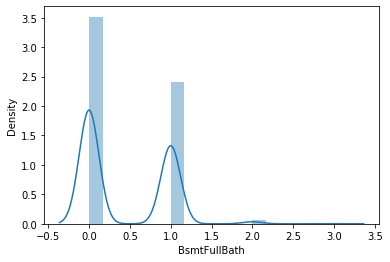

In [216]:

#BsmtFullBath: This attribute Identifies Basement full bathrooms
sns.distplot(housing_data['BsmtFullBath'])
plt.show()

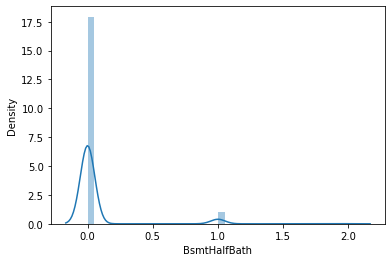

In [217]:

#BsmtHalfBath: This attribute Identifies Basement half bathrooms
sns.distplot(housing_data['BsmtHalfBath'])
plt.show()

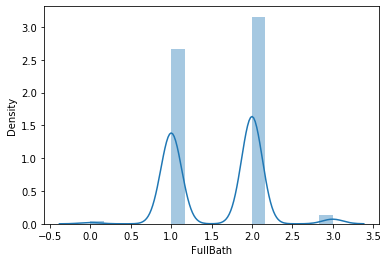

In [218]:
#FullBath: This attribute Identifies Full bathrooms above grade
sns.distplot(housing_data['FullBath'])
plt.show()

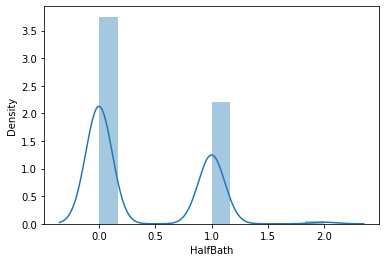

In [219]:

#HalfBath: This attribute Identifies Half baths above grade
sns.distplot(housing_data['HalfBath'])
plt.show()

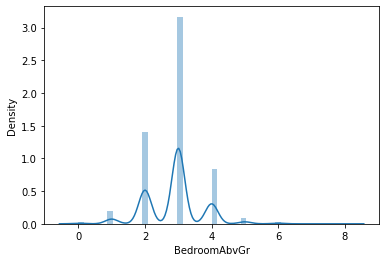

In [220]:

#BedroomAbvGr: This attribute Identifies Bedrooms above grade (does NOT include basement bedrooms)
sns.distplot(housing_data['BedroomAbvGr'])
plt.show()

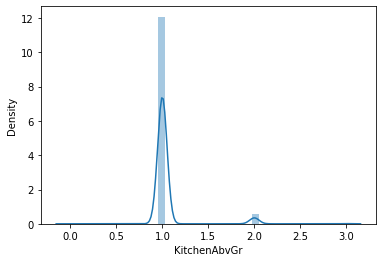

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [221]:

#KitchenAbvGr: This attribute Identifies Kitchens above grade
sns.distplot(housing_data['KitchenAbvGr'])
plt.show()
housing_data['KitchenAbvGr'].value_counts()

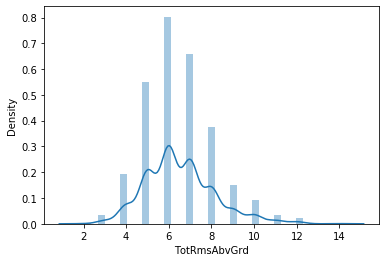

In [222]:

#TotRmsAbvGrd: This attribute Identifies Total rooms above grade (does not include bathrooms)
sns.distplot(housing_data['TotRmsAbvGrd'])
plt.show()

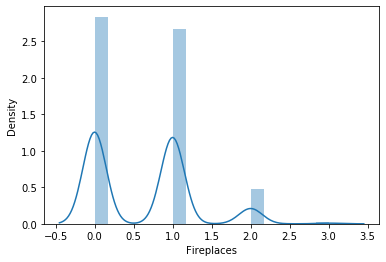

In [223]:

#Fireplaces: This attribute Identifies Number of fireplaces
sns.distplot(housing_data['Fireplaces'])
plt.show()

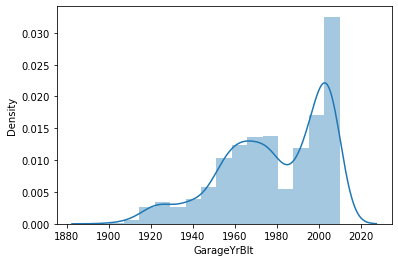

In [224]:

#GarageYrBlt: This attribute Identifies Year garage was built
sns.distplot(housing_data['GarageYrBlt'])
plt.show()

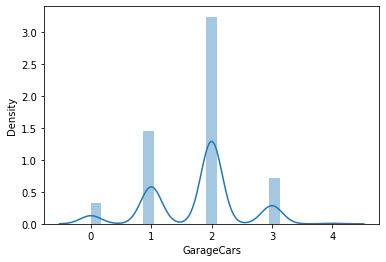

In [225]:
              
#GarageCars: This attribute Identifies Size of garage in car capacity
sns.distplot(housing_data['GarageCars'])
plt.show()

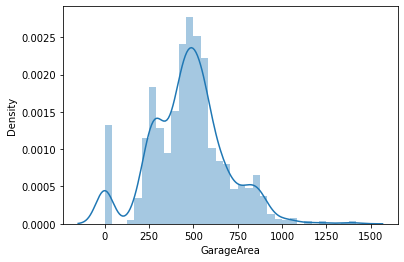

In [226]:

#GarageArea: This attribute Identifies Size of garage in square feet
sns.distplot(housing_data['GarageArea'])
plt.show()

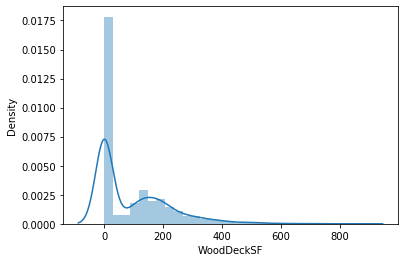

In [227]:
              
#WoodDeckSF: This attribute Identifies Wood deck area in square feet
sns.distplot(housing_data['WoodDeckSF'])
plt.show()

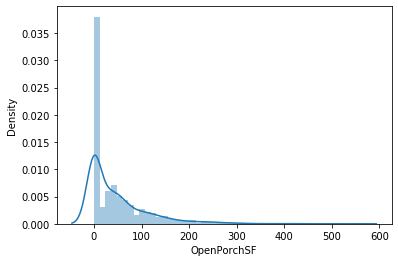

In [228]:

#OpenPorchSF: This attribute Identifies Open porch area in square feet
sns.distplot(housing_data['OpenPorchSF'])
plt.show()

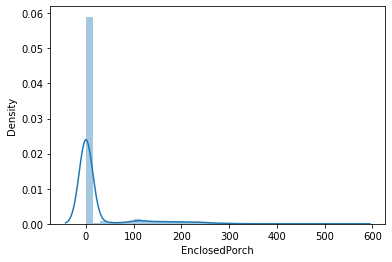

0      1252
112      15
96        6
120       5
144       5
192       5
216       5
252       4
116       4
156       4
126       3
228       3
128       3
184       3
102       3
150       3
40        3
176       3
164       3
77        2
185       2
80        2
180       2
84        2
160       2
168       2
205       2
158       2
154       2
100       2
108       2
137       2
114       2
115       2
202       2
190       2
234       2
244       2
36        2
240       2
34        2
39        2
224       2
32        2
264       2
236       2
30        1
105       1
94        1
24        1
99        1
98        1
318       1
20        1
301       1
330       1
19        1
56        1
54        1
37        1
60        1
64        1
67        1
68        1
70        1
294       1
52        1
50        1
48        1
44        1
42        1
81        1
87        1
90        1
91        1
275       1
293       1
123       1
221       1
200       1
208       1
210       1
212       1
214 

In [229]:

#EnclosedPorch: This attribute Identifies Enclosed porch area in square feet
sns.distplot(housing_data['EnclosedPorch'])
plt.show()
housing_data['EnclosedPorch'].value_counts()

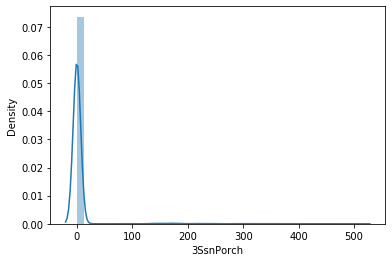

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [230]:

#3SsnPorch: This attribute Identifies Three season porch area in square feet
sns.distplot(housing_data['3SsnPorch'])
plt.show()
housing_data['3SsnPorch'].value_counts()

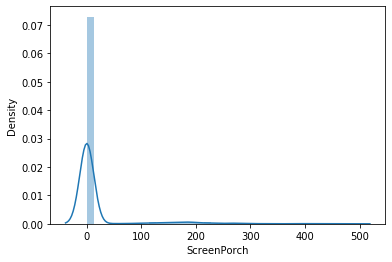

0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
140       1
161       1
128       1
122       1
410       1
119       1
116       1
99        1
95        1
80        1
63        1
60        1
53        1
40        1
130       1
175       1
163       1
165       1
291       1
287       1
276       1
273       1
271       1
266       1
265       1
263       1
260       1
252       1
234       1
233       1
225       1
374       1
222       1
220       1
210       1
204       1
197       1
385       1
190       1
396       1
185       1
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, dtype: int64

In [231]:

#ScreenPorch: This attribute Identifies Screen porch area in square feet
sns.distplot(housing_data['ScreenPorch'])
plt.show()
housing_data['ScreenPorch'].value_counts()

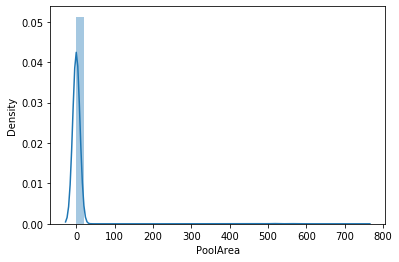

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [232]:

#PoolArea: This attribute Identifies Pool area in square feet
sns.distplot(housing_data['PoolArea'])
plt.show()
housing_data['PoolArea'].value_counts()

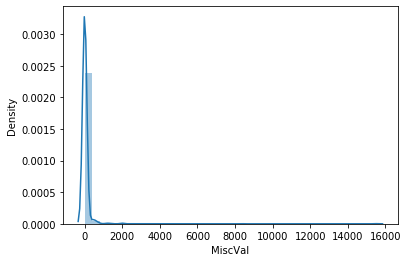

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [233]:

#MiscVal: This attribute Identifies $Value of miscellaneous feature
sns.distplot(housing_data['MiscVal'])
plt.show()
housing_data['MiscVal'].value_counts()

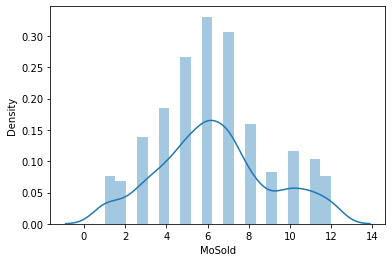

In [234]:

#MoSold: This attribute Identifies Month Sold (MM)
sns.distplot(housing_data['MoSold'])
plt.show()

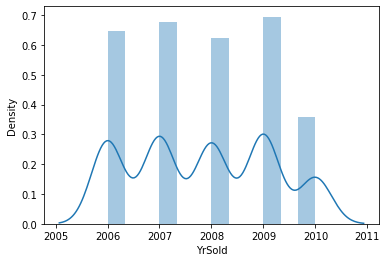

In [235]:

#YrSold: This attribute Identifies Year Sold (YYYY)
sns.distplot(housing_data['YrSold'])
plt.show()

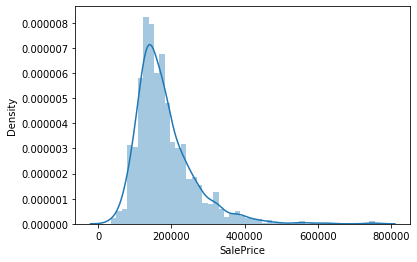

In [236]:

#SalePrice: This is the output/precited variable of the dataset
sns.distplot(housing_data['SalePrice'])
plt.show()

In [237]:
#### from above univariate analysis, we get some iirelevant columns which are either meaningless to keep or 
# contain mostlyt 1 single value. Hence it is always a good practice to get rid of them.
Irrelevant_Columns=['Id','Street','Utilities','Condition2','RoofMatl','Heating']
for col in Irrelevant_Columns:
    housing_data=housing_data.drop(col,axis=1)

In [238]:
housing_data.shape

(1460, 75)

#### Data Exploration via bivariate analysis

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.

First lets segregate numerical and categorical attributes

In [239]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

housing_data_numeric = housing_data.select_dtypes(include=numerics)
housing_data_categorical = housing_data.select_dtypes(exclude=numerics)

In [240]:
housing_data_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [241]:
housing_data_categorical.columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

####   'MSSubClass', 'OverallQual', 'OverallCond' are catergorial column although they have numeric values.
Also, 'SalePrice' is outpout variable

In [242]:
# list of numeric columns in dataset
housing_input_data_numeric_columns=[ 'LotFrontage', 'LotArea',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

In [243]:
# list of categorical columns in dataset
housing_input_data_categorical_columns = ['MSSubClass','MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [244]:
# output column/ predicted column
housing_output_column='SalePrice'

#### Bivariate analysis

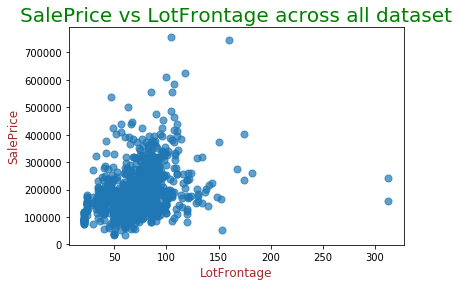

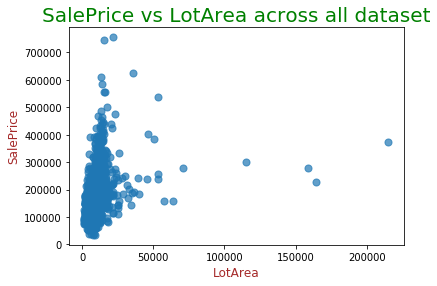

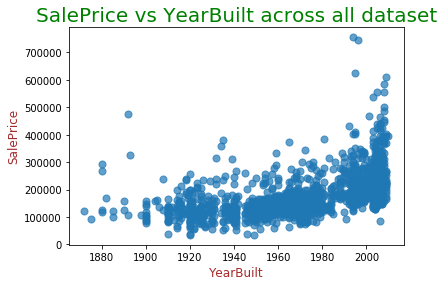

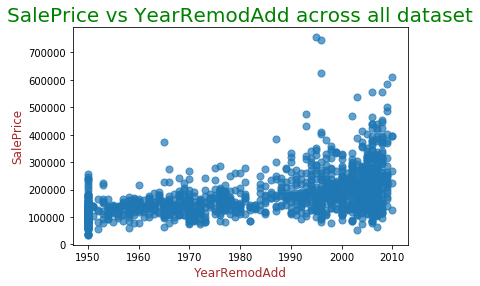

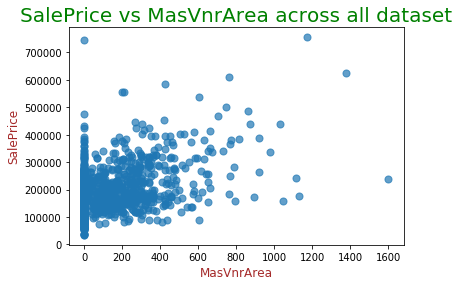

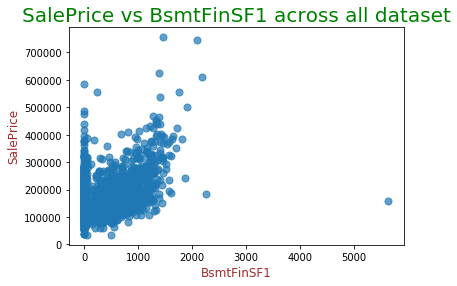

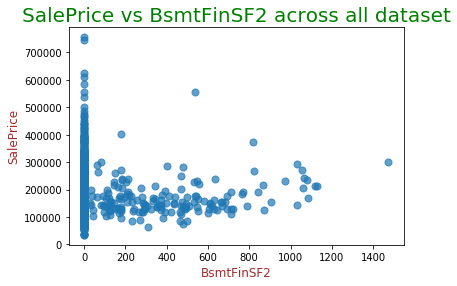

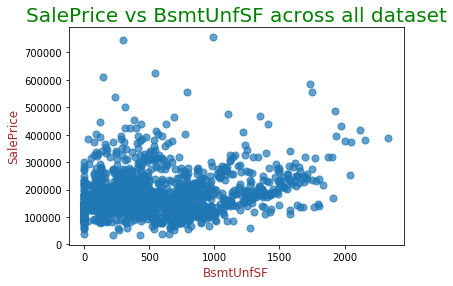

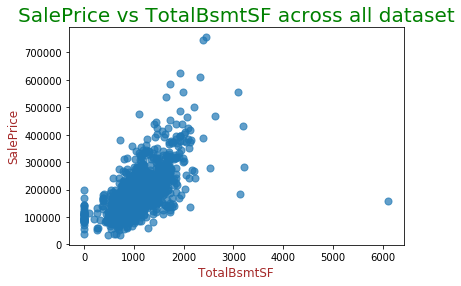

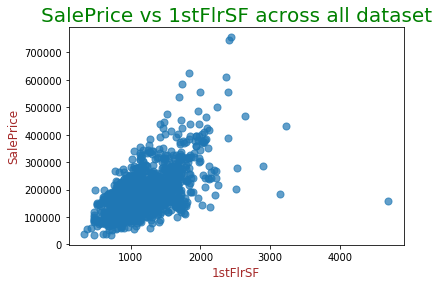

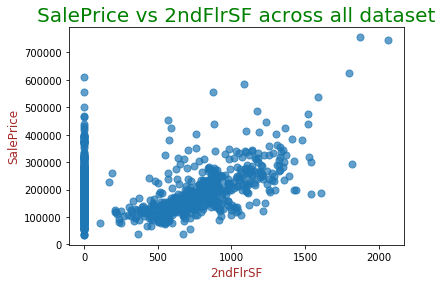

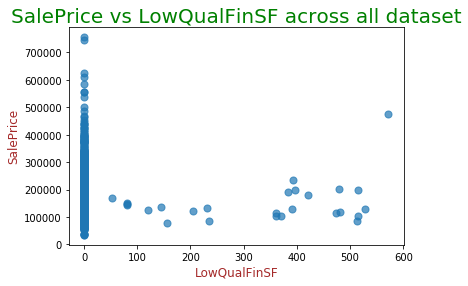

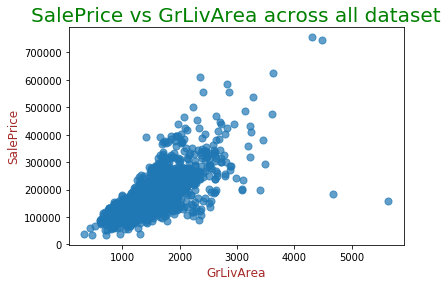

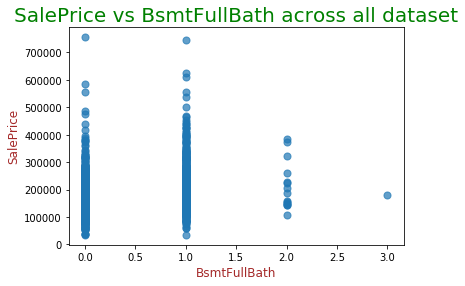

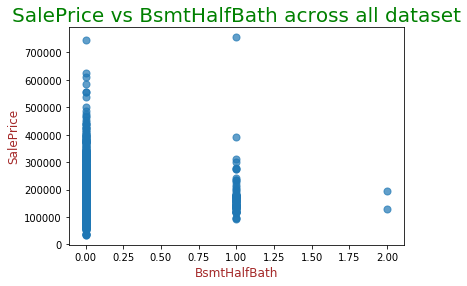

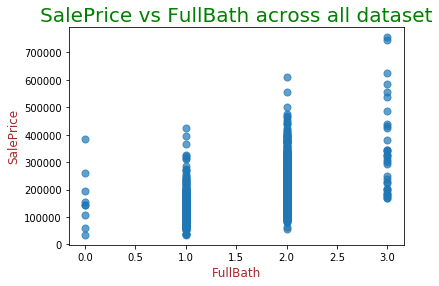

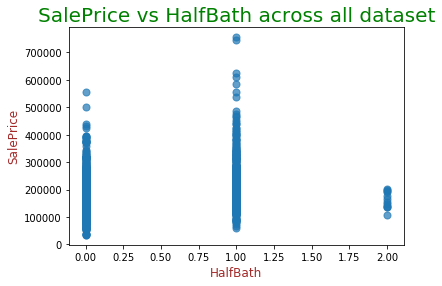

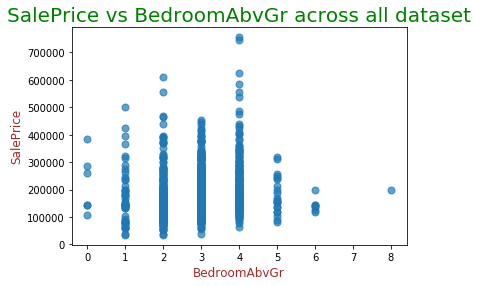

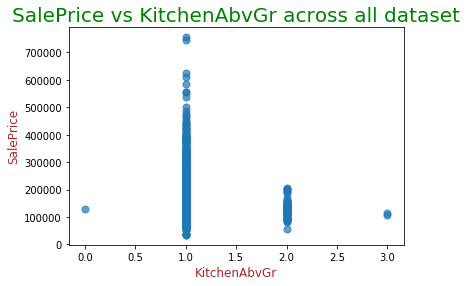

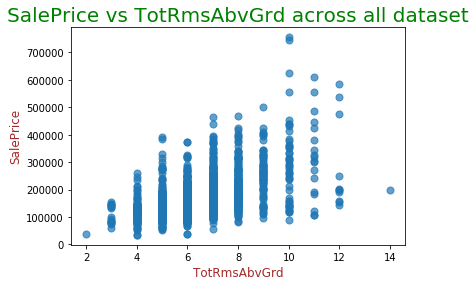

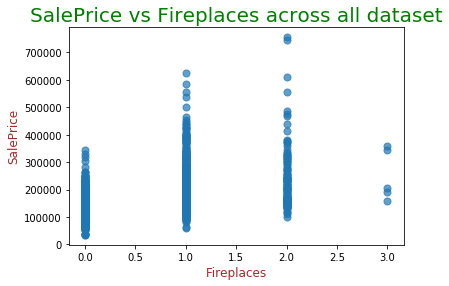

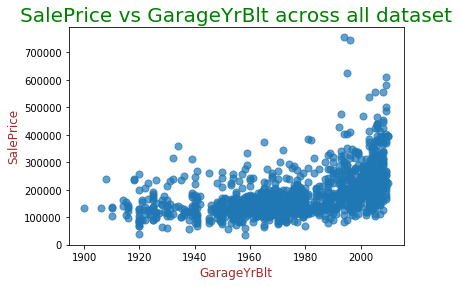

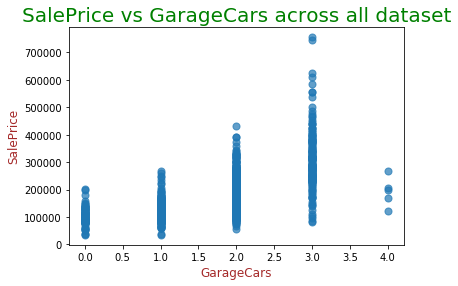

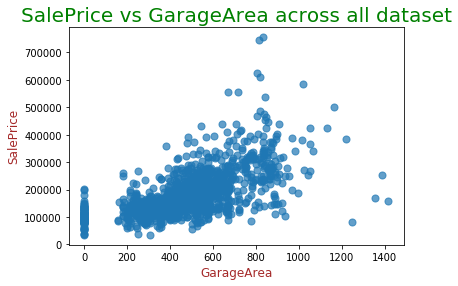

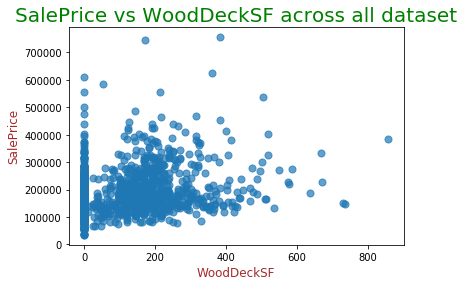

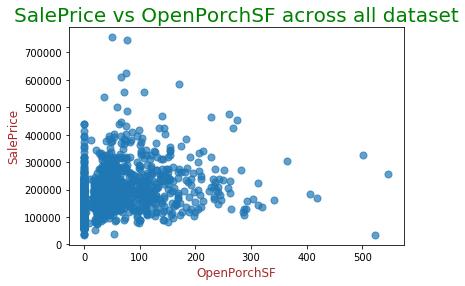

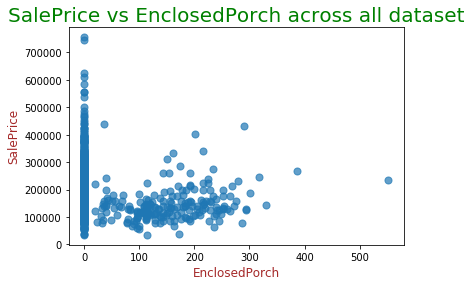

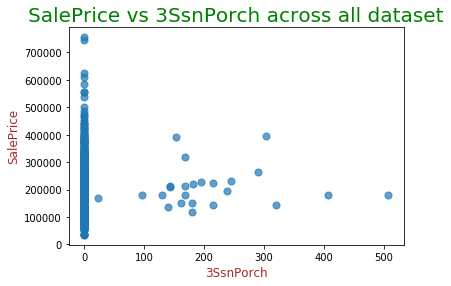

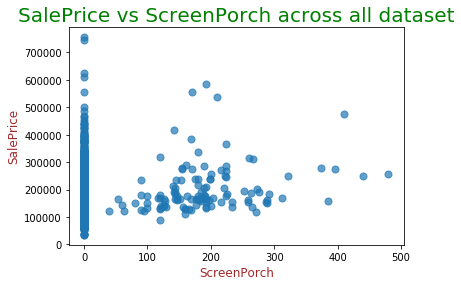

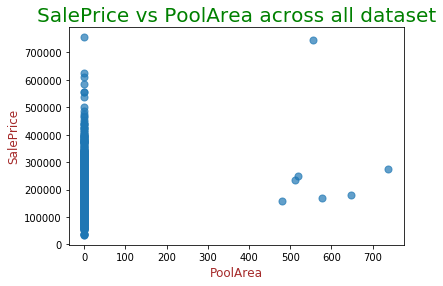

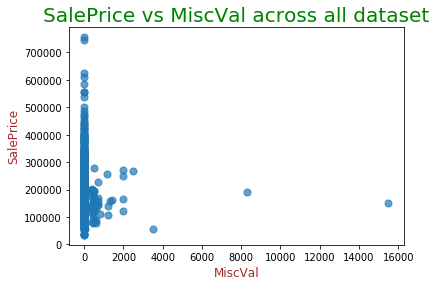

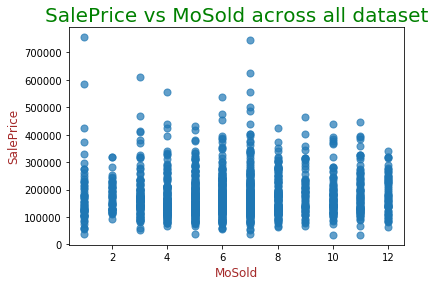

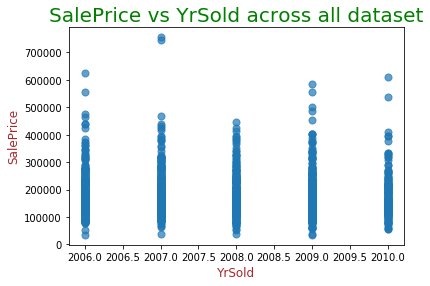

In [245]:
# plotting scatter chart between input numerical columns and output column
# This plotting will help us undertsand if output variable is having any relationship with input variable or not

for numeric_column in housing_input_data_numeric_columns:
    plt.scatter(housing_data[numeric_column], housing_data[housing_output_column], alpha= 0.7, s = 50 )
    # Adding and formatting title
    plt.title("SalePrice vs "+ numeric_column+" across all dataset", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

    # Labeling Axes
    plt.xlabel(numeric_column, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.ylabel("SalePrice", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.show()

In [246]:
## looking at above bivariate analysis, some of the input features seem clearly unfit for regression
## It is always a good practice to drop them in first place
Irrelevant_Numeric_Columns=['MasVnrArea','BsmtFinSF2','LowQualFinSF','BsmtFullBath','OpenPorchSF','EnclosedPorch','3SsnPorch',
                           'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

for col in Irrelevant_Numeric_Columns:
    housing_data=housing_data.drop(col,axis=1)

In [247]:
# size of dataset after removing above columns
housing_data.shape

(1460, 63)

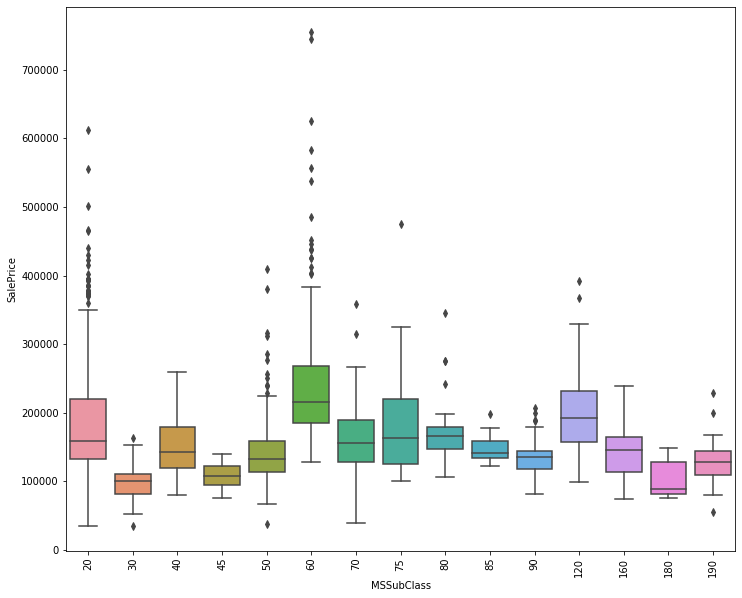

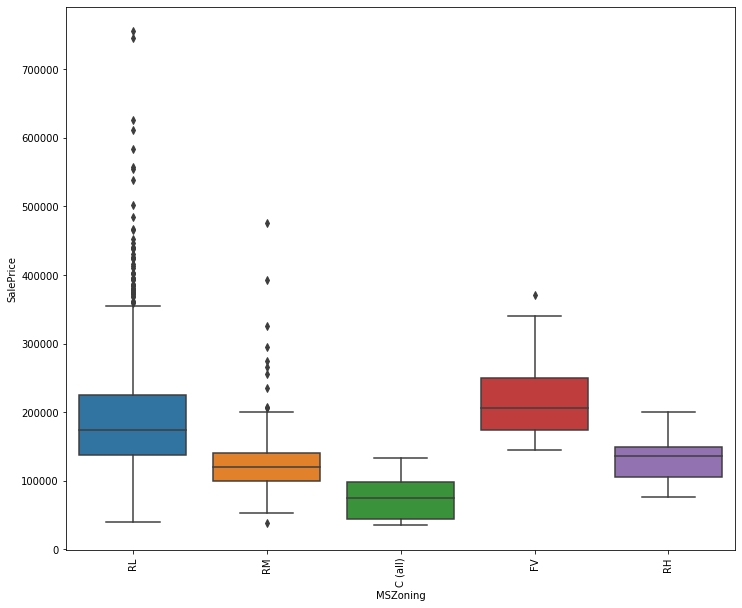

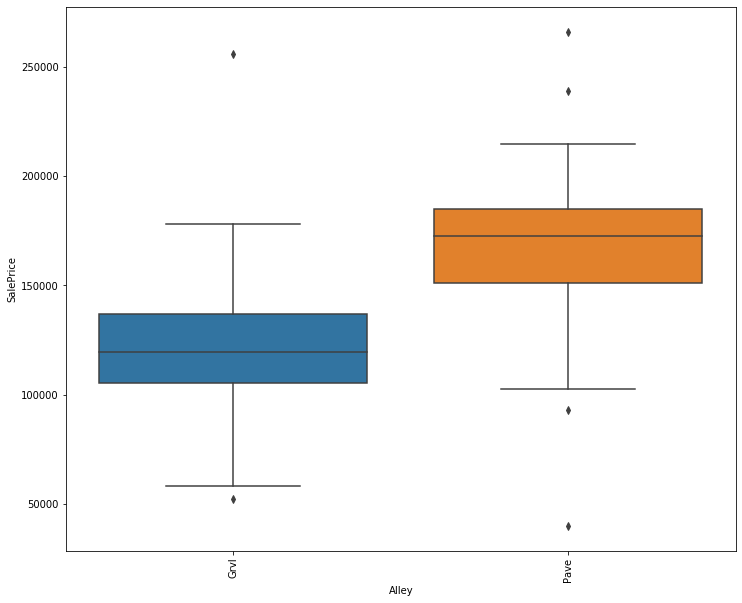

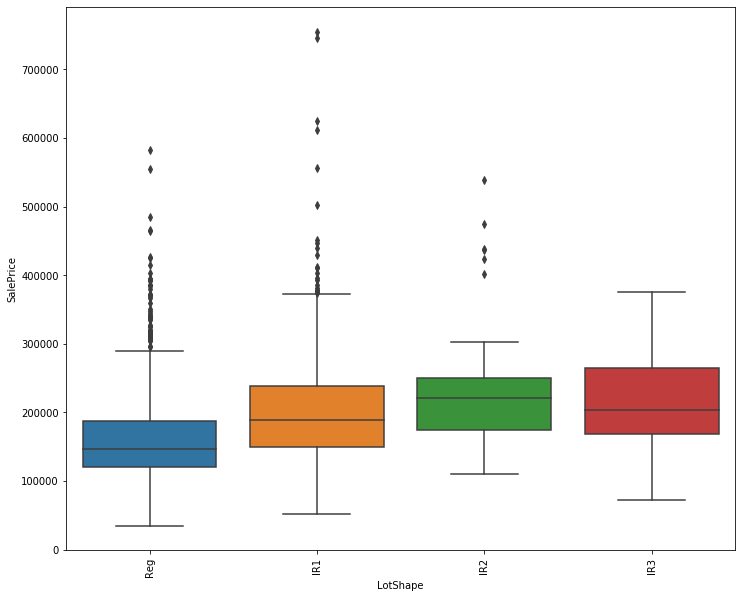

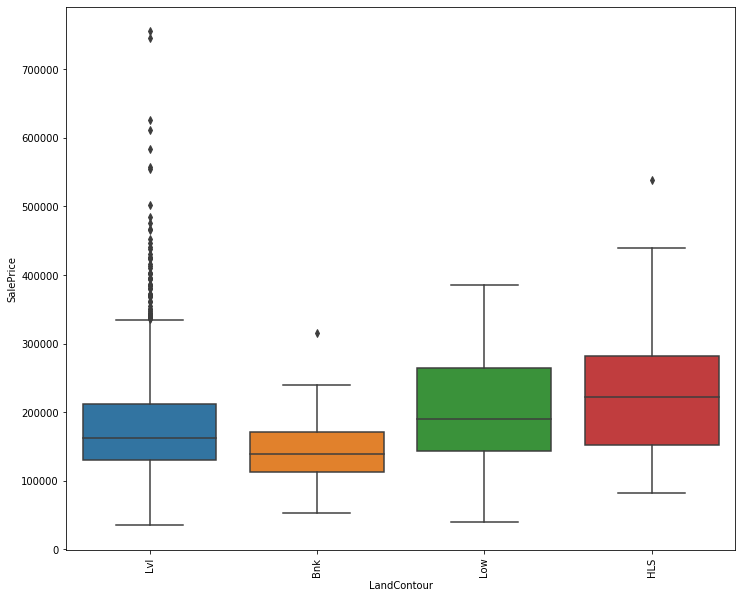

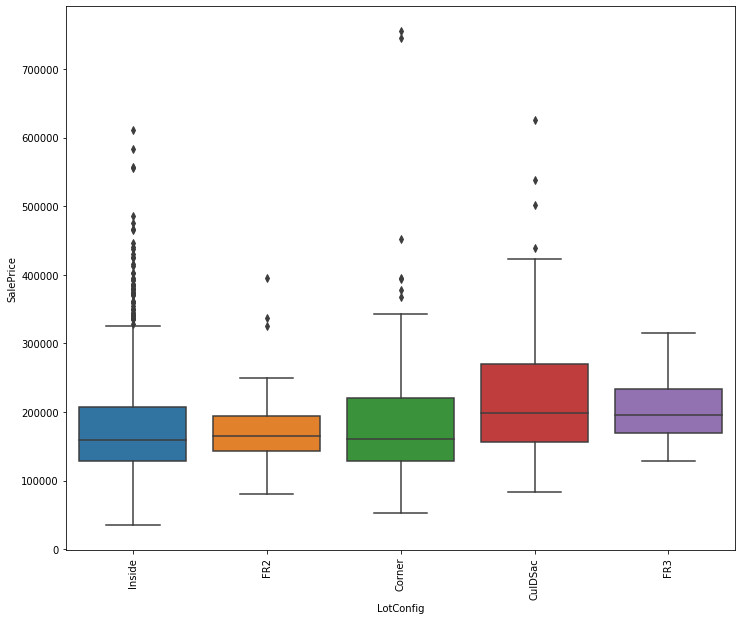

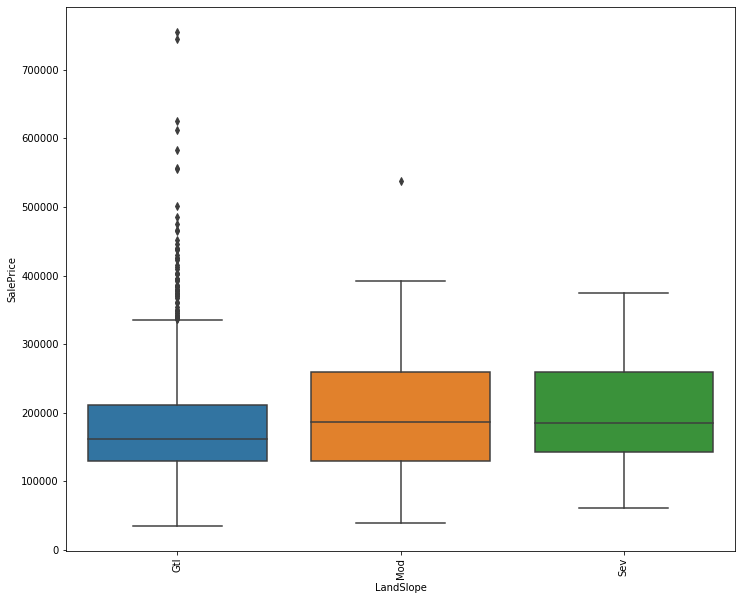

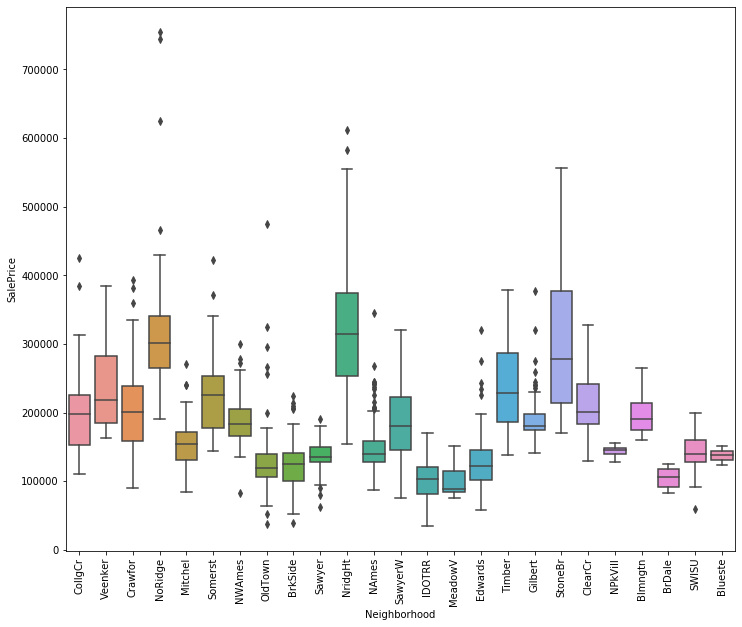

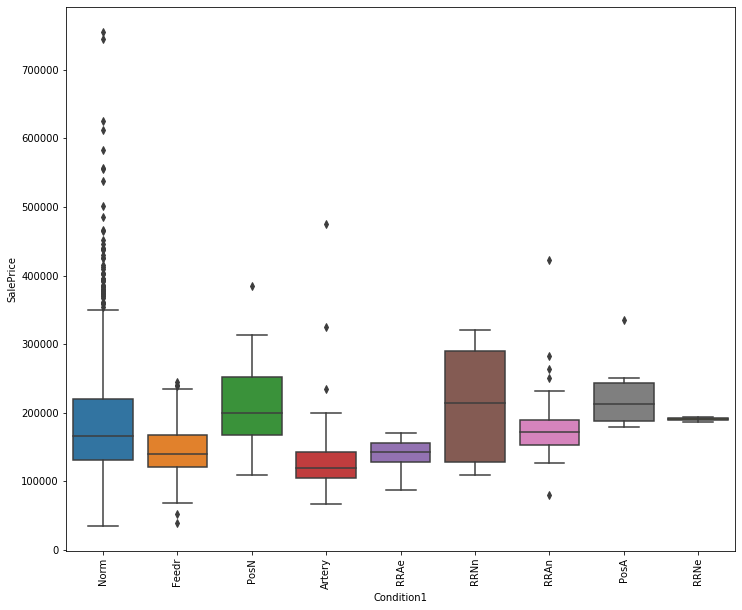

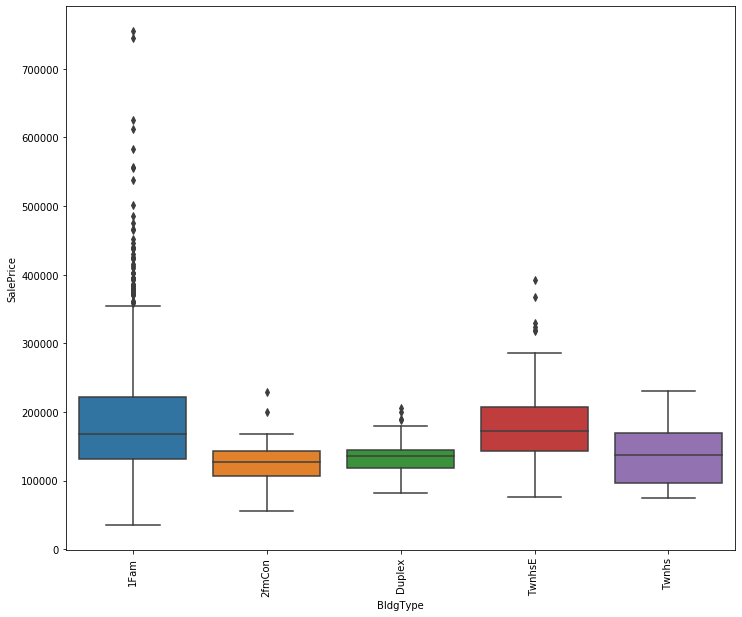

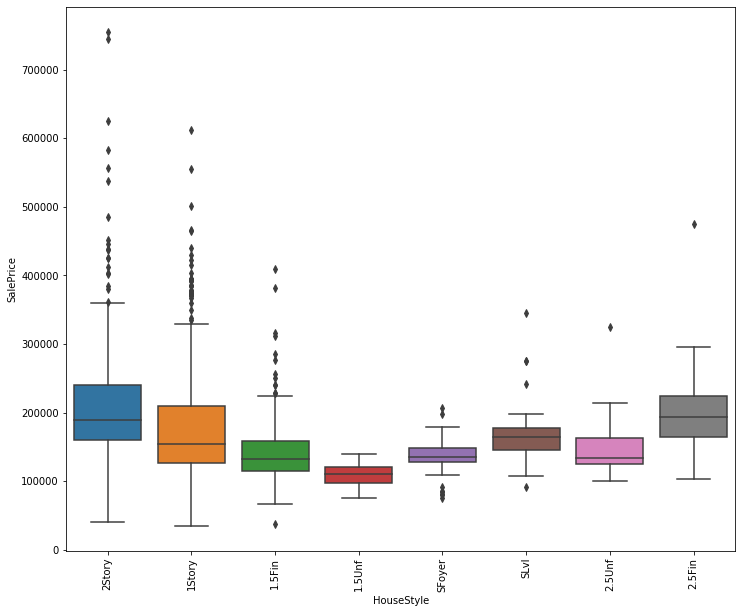

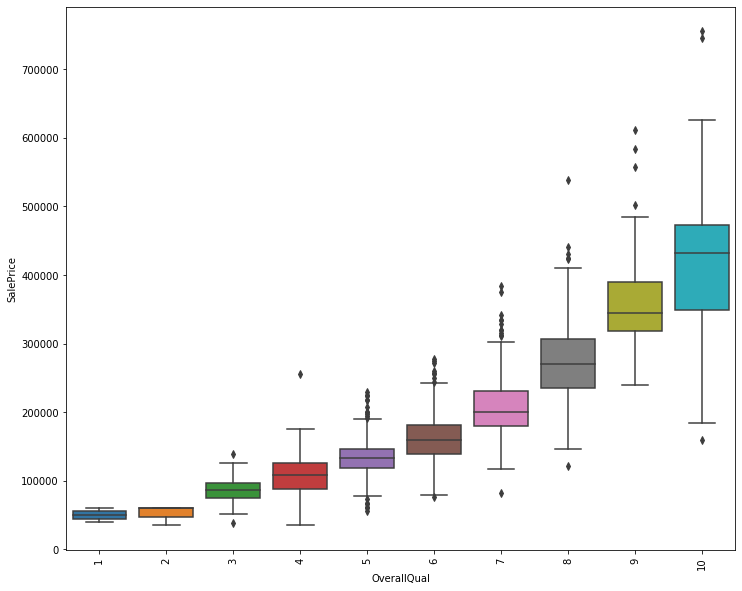

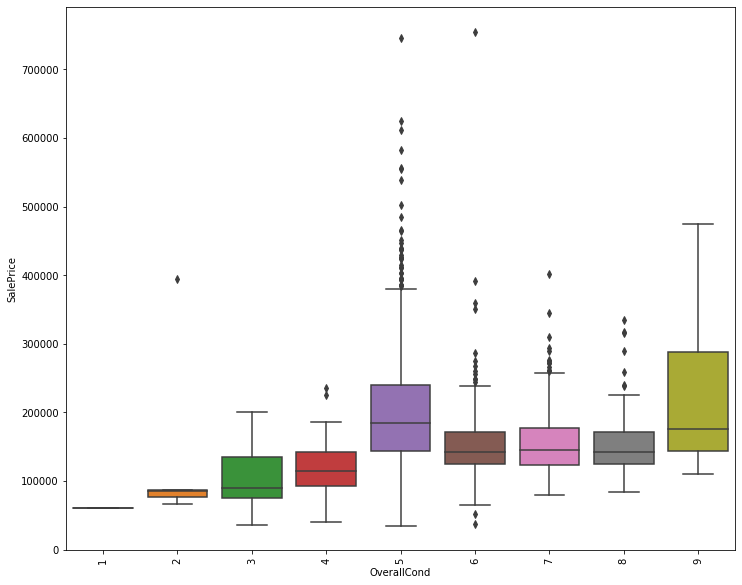

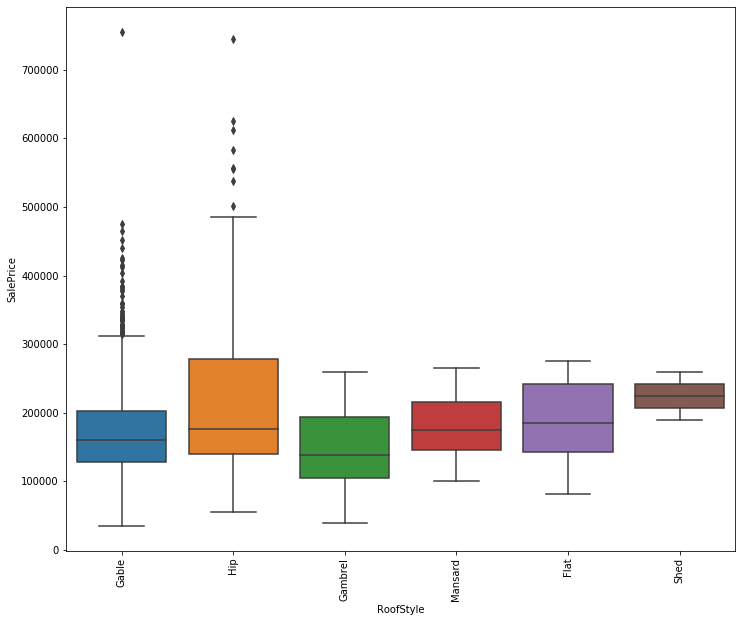

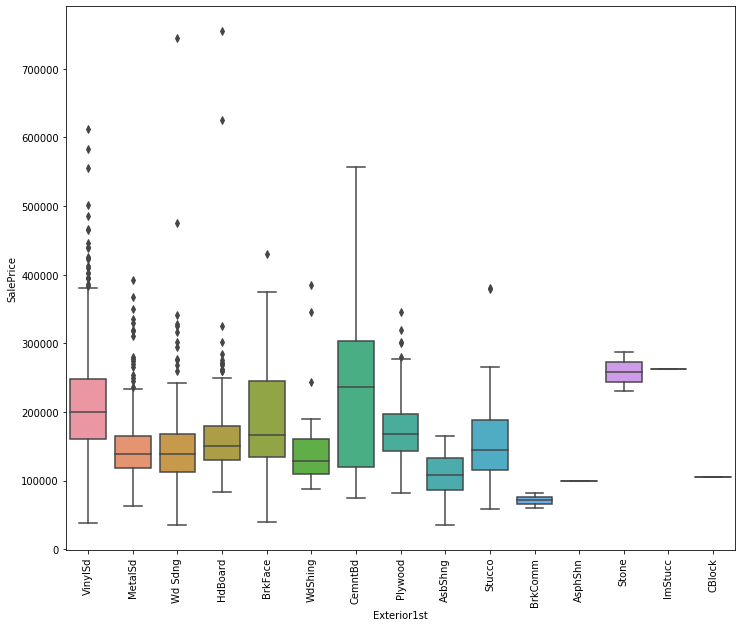

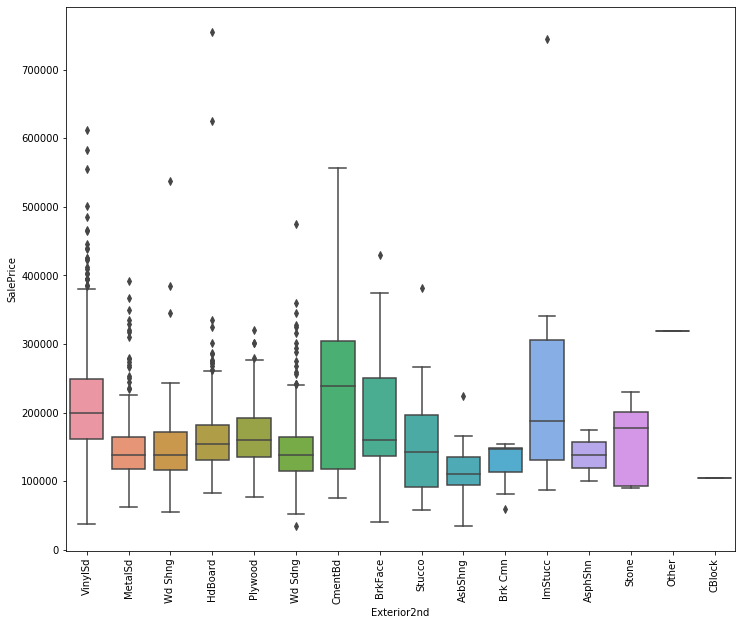

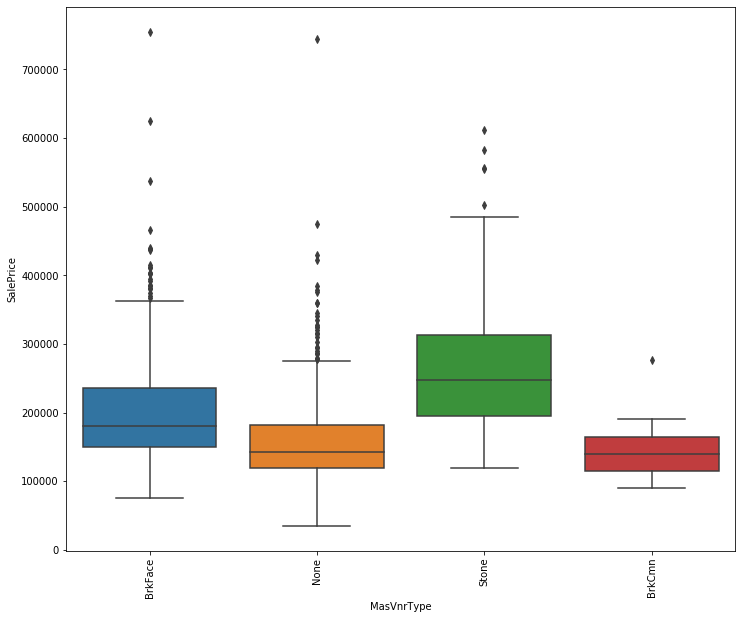

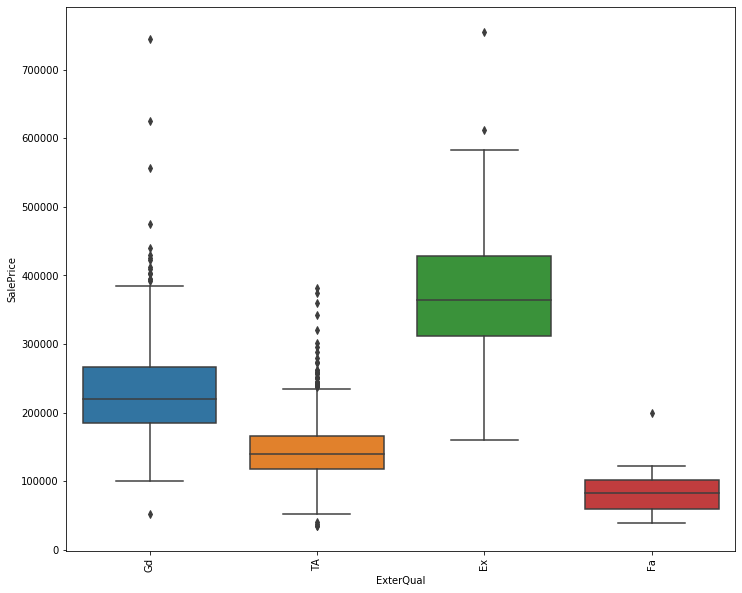

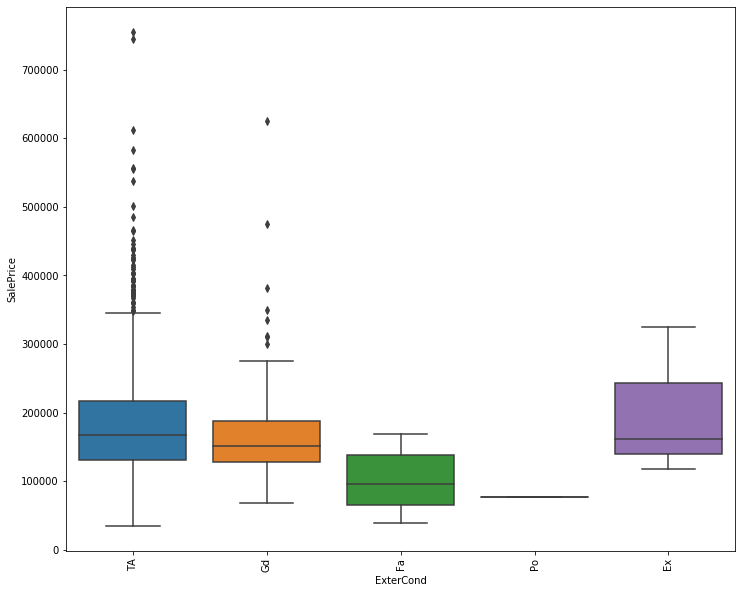

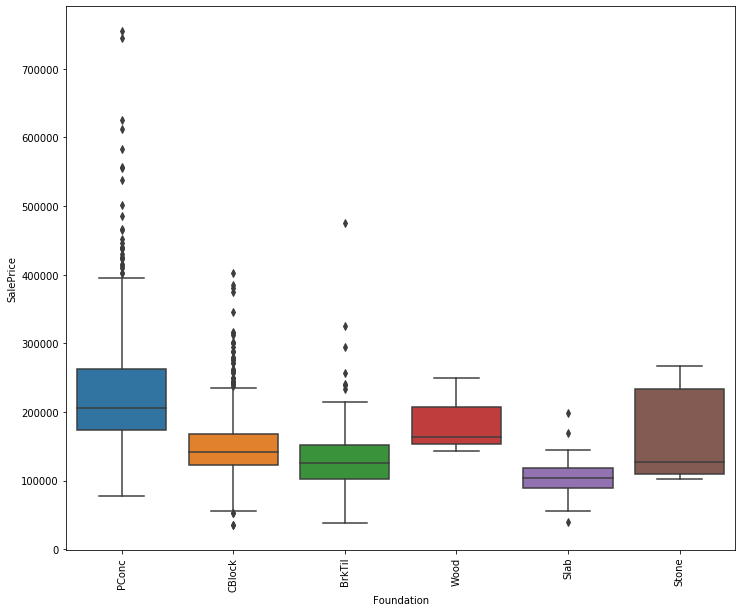

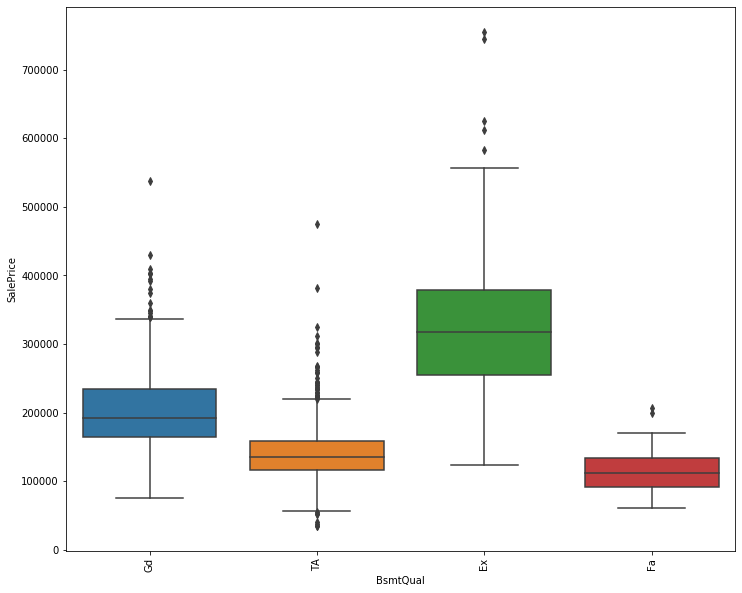

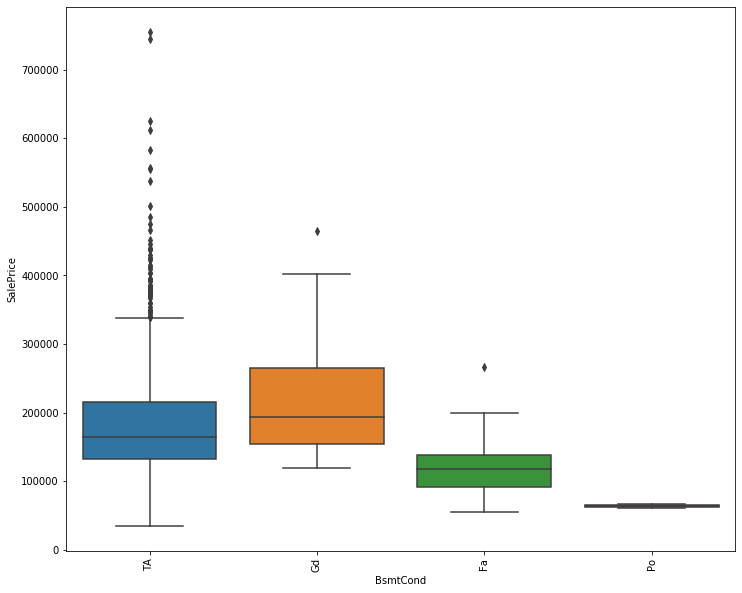

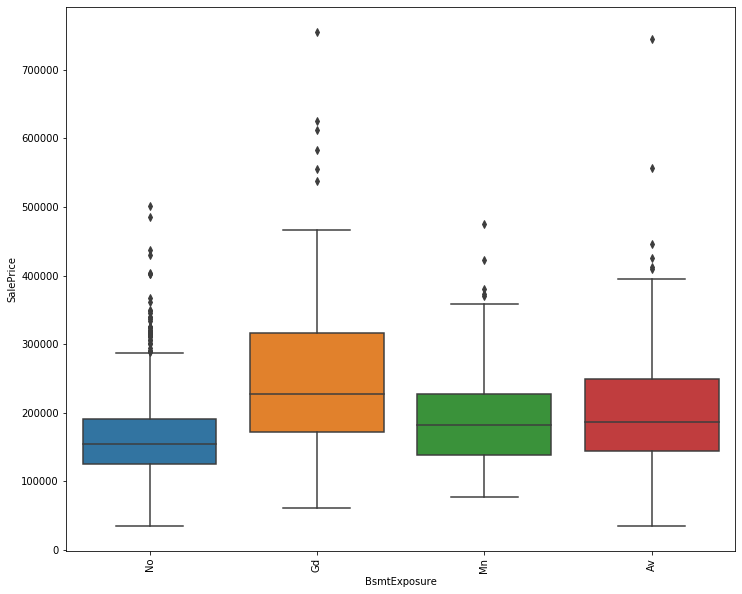

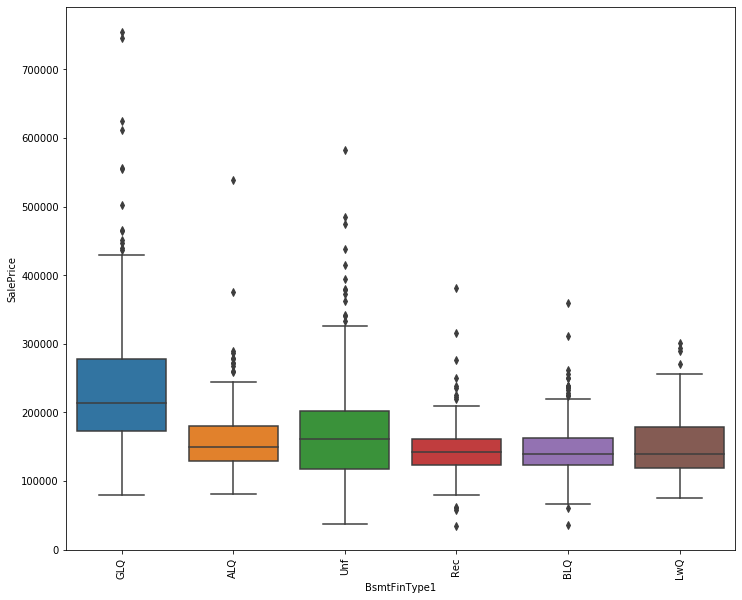

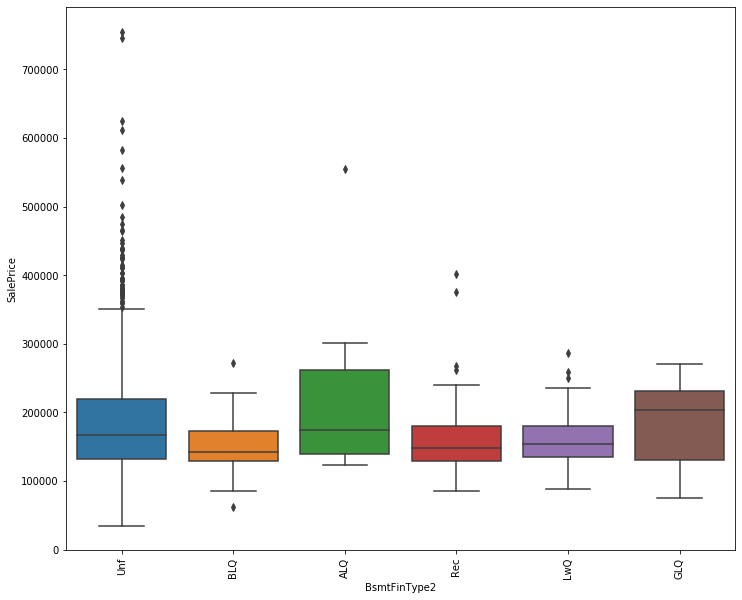

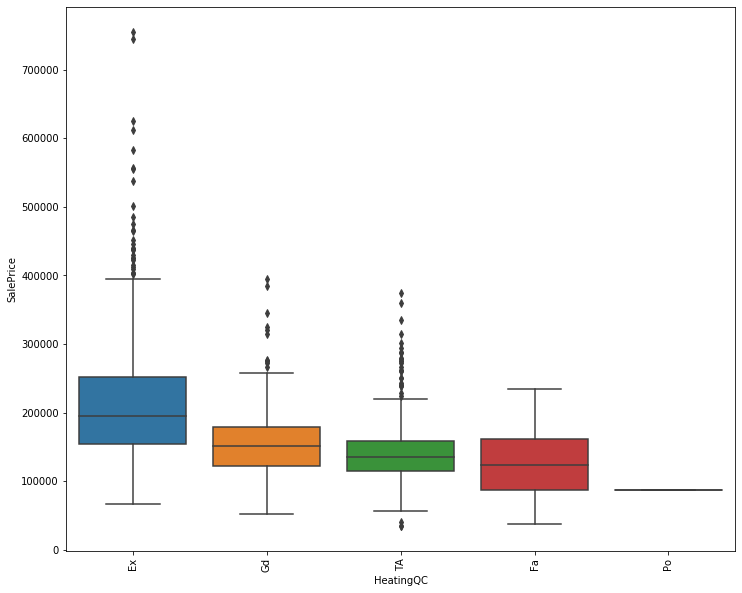

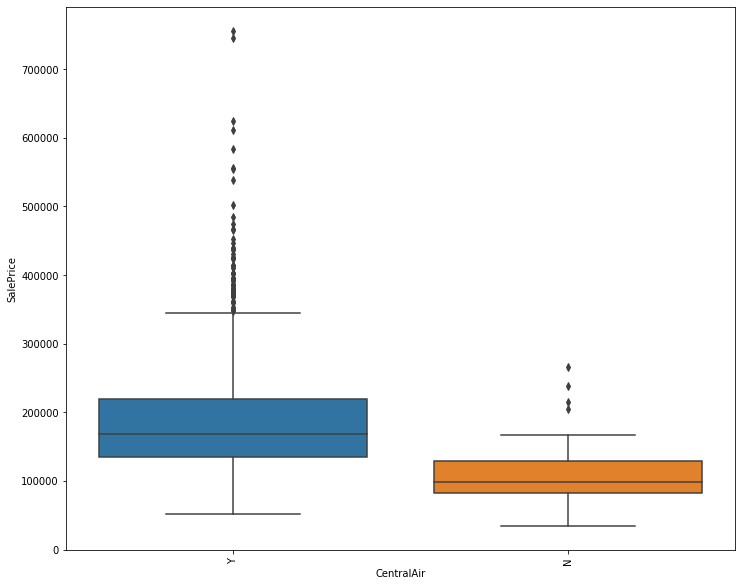

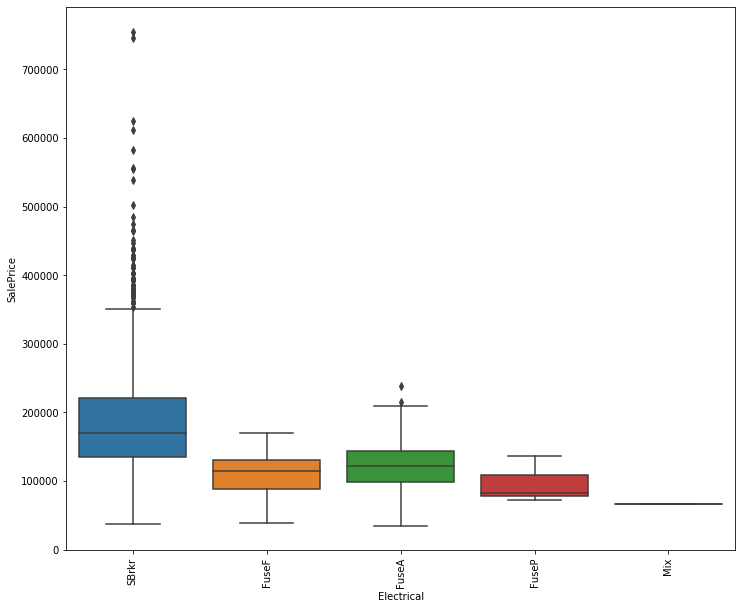

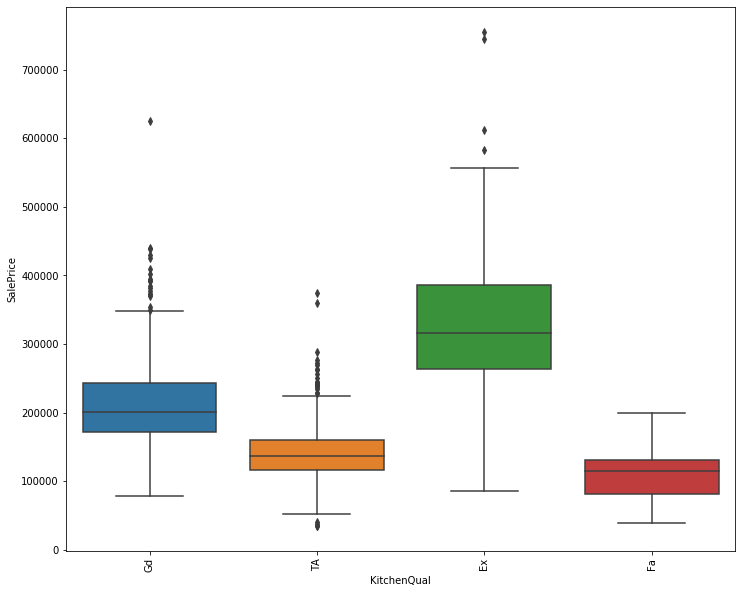

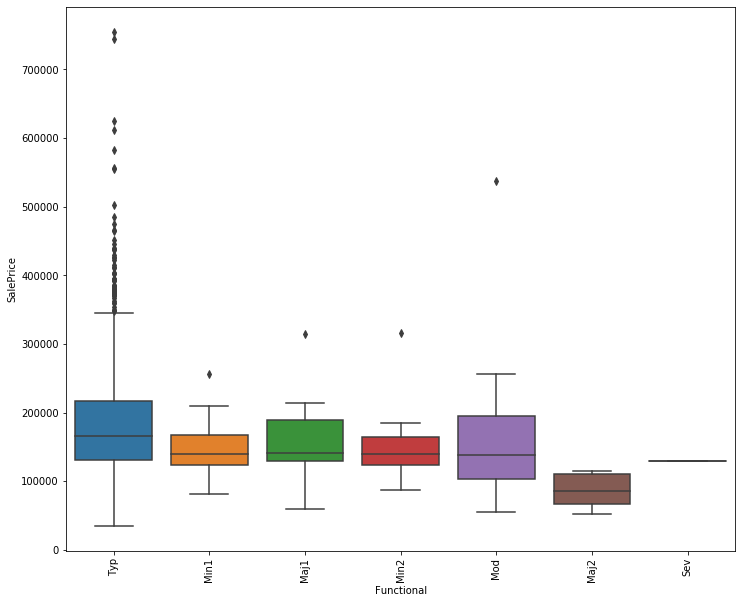

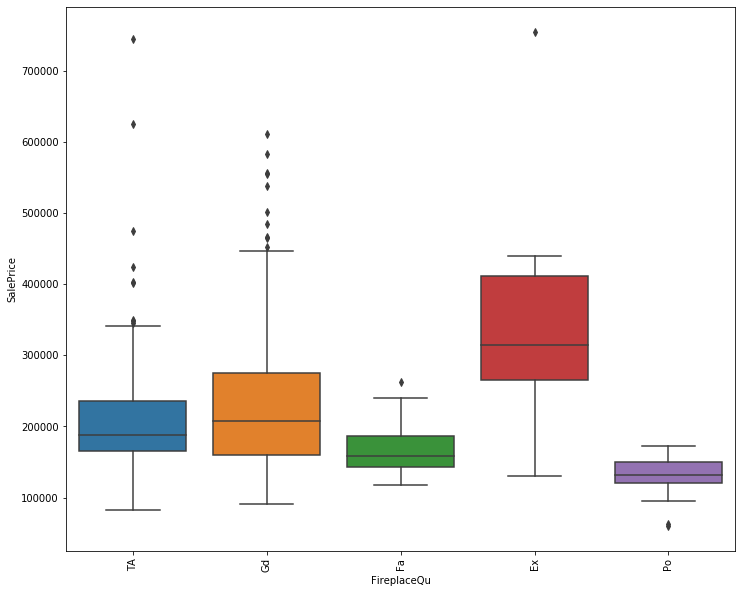

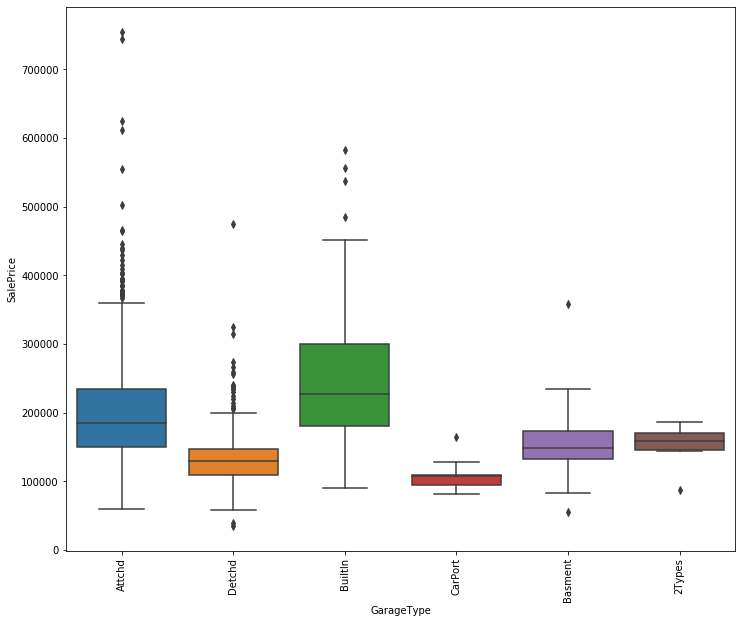

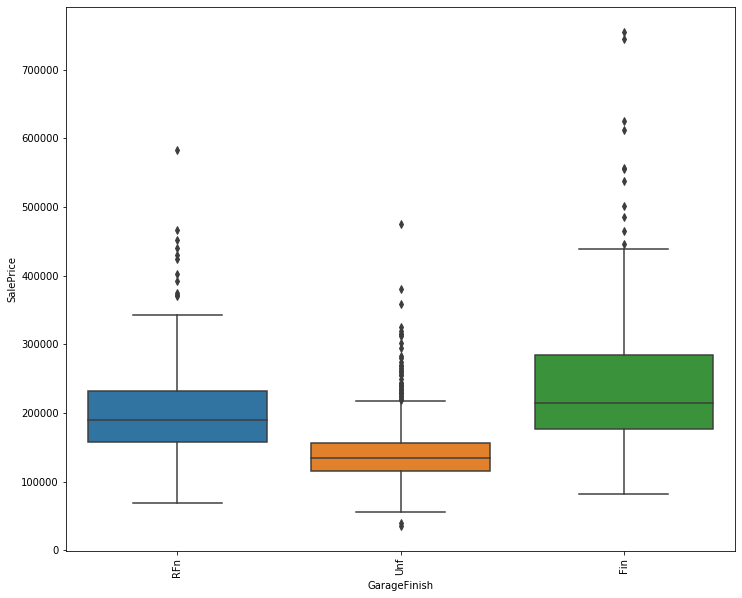

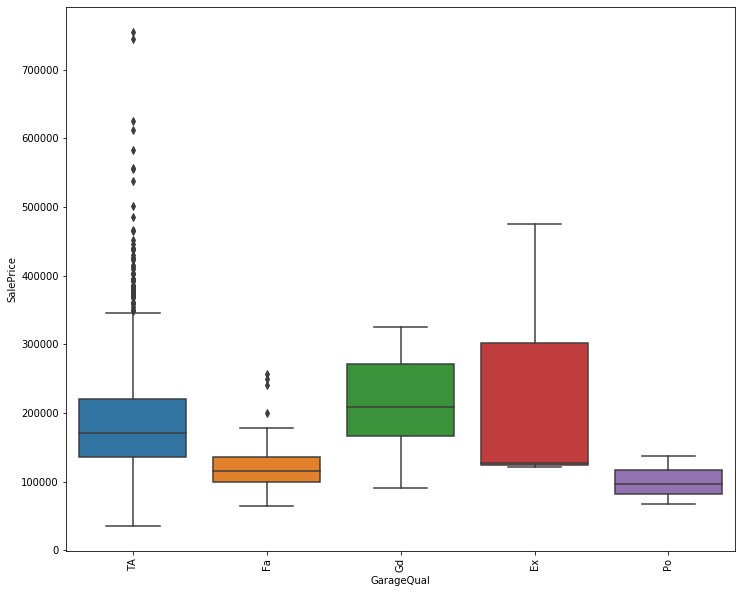

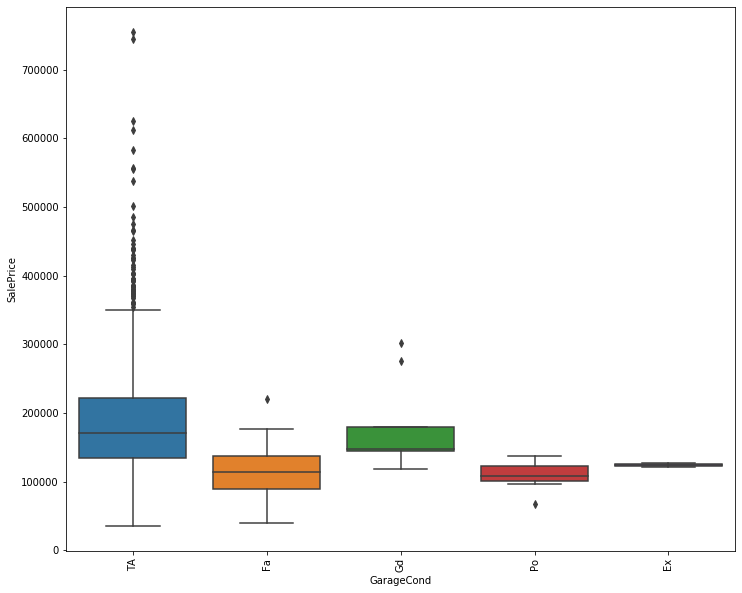

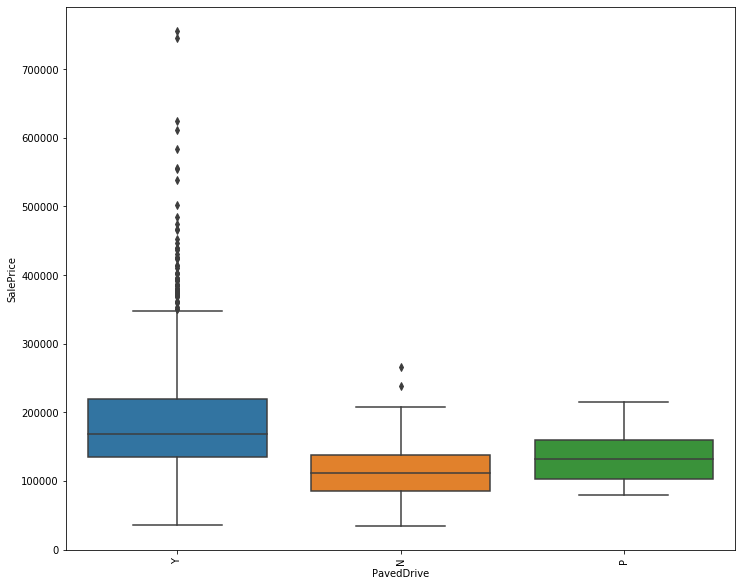

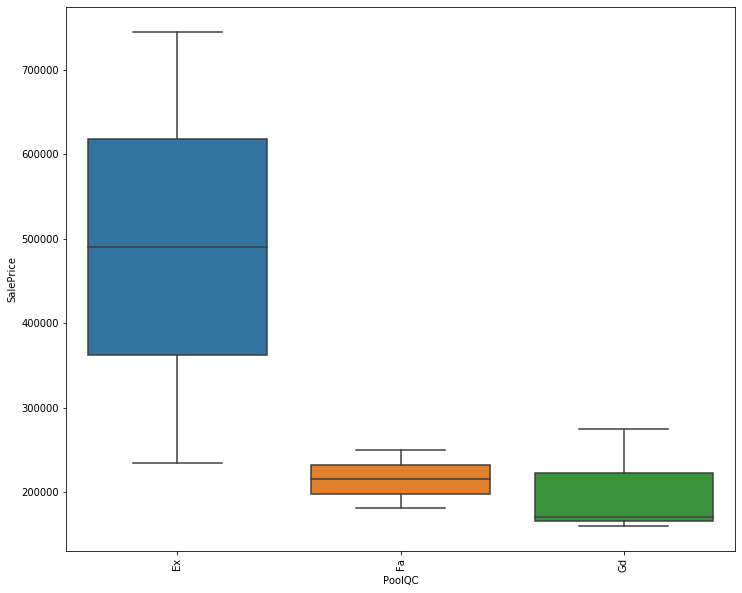

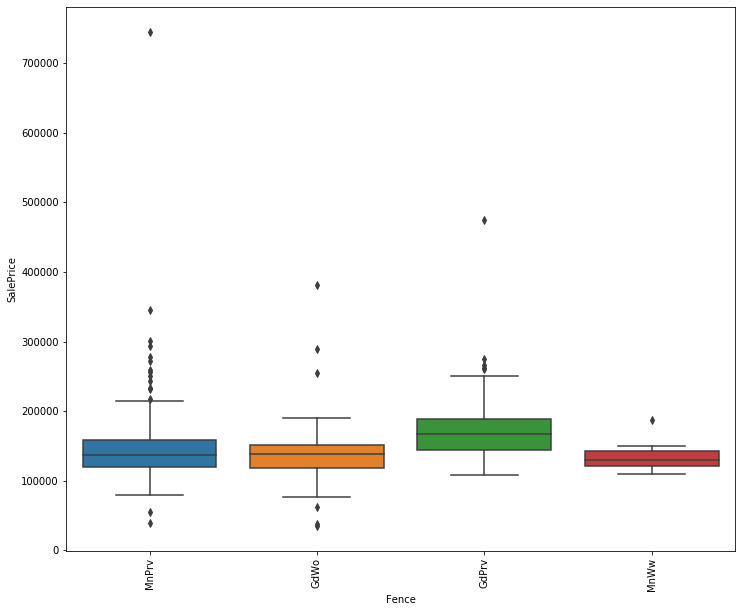

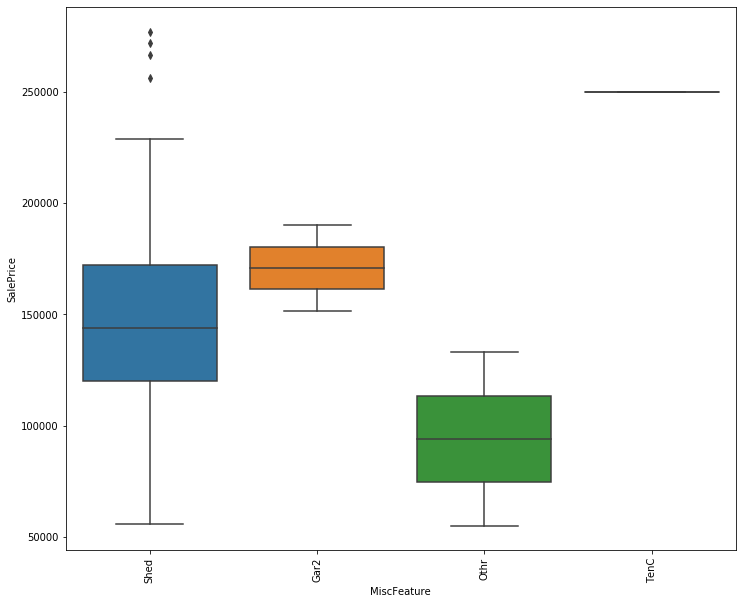

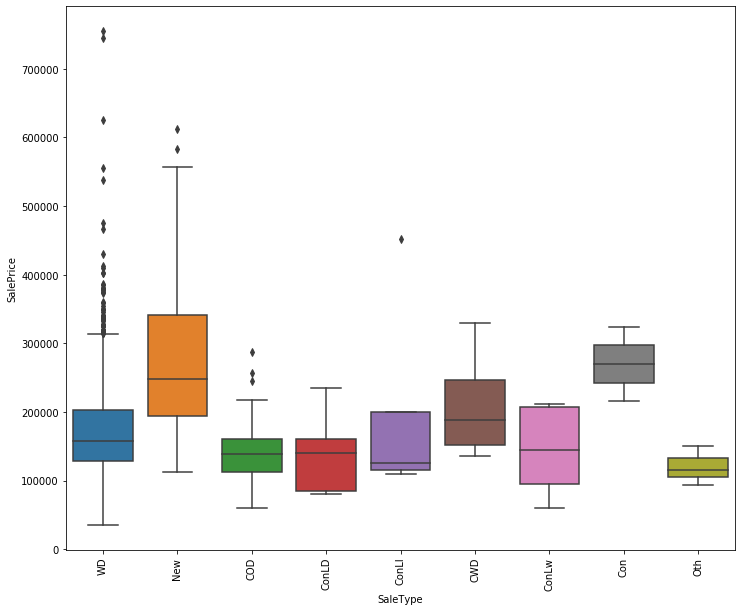

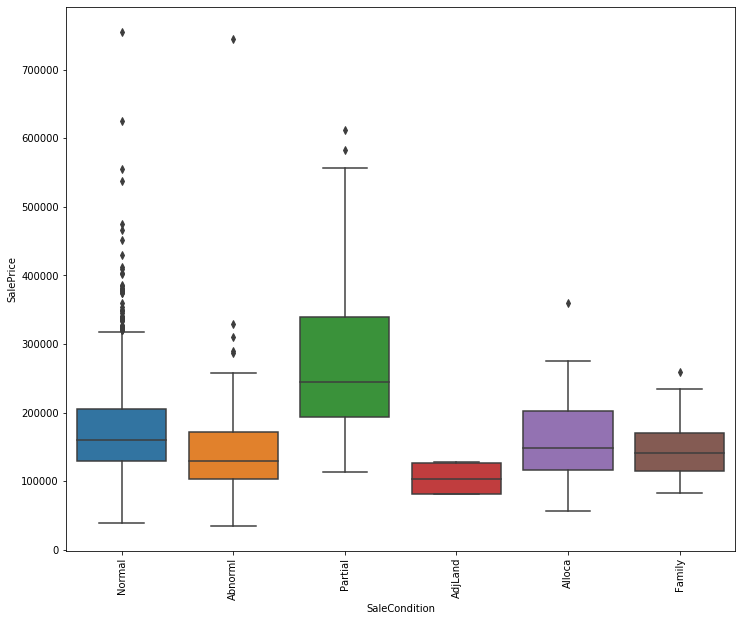

In [248]:
# plotting box chart between categorical columns and output column
# This is a good visualisation method to interprete behaviour of different categories on output value
for categorical_column in housing_input_data_categorical_columns:
    plt.figure(figsize=[12,10])
    plt.xticks(rotation=90)
    sns.boxplot(housing_data[categorical_column] , housing_data[housing_output_column])
    plt.show()

In [249]:
## looking at above bivariate analysis of categorical variables vs output, all features seem relevant.
# We can not drop any at this point

### Data cleaning

We have already dropped couple of columns during ealier analysis of univariate and bivariate.
Lets do some more cleaning to get a better quality model to train

#### removing columns having more than 50% null data

In [250]:
isAttrNull=(housing_data.isnull().sum()/housing_data.count())>0.5

redundant_columns_with_high_null_values=housing_data.columns[isAttrNull]

print(redundant_columns_with_high_null_values)

housing_data=housing_data.drop(axis=1,columns=redundant_columns_with_high_null_values)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [251]:
# shape of dataset after removing above columns
print(housing_data.shape)

(1460, 58)


In [252]:
# printing the columns in dataset and total no of the columns
print(housing_data.columns)
print(len(housing_data.columns))

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')
58


In [253]:
# final list of numeric columns after data cleaning

housing_input_data_numeric_columns=[ 'LotFrontage', 'LotArea',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'
        ]

In [254]:
# final list of categorical columns after data cleaning

housing_input_data_categorical_columns = ['MSSubClass','MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
         'SaleType', 'SaleCondition']

In [255]:
# output/ predicted column

housing_output_column='SalePrice'

In [256]:
'''print(len(housing_input_data_numeric_columns))
print(len(housing_input_data_categorical_columns))
print(len(housing_input_data_numeric_columns)+len(housing_input_data_categorical_columns))
'''

'print(len(housing_input_data_numeric_columns))\nprint(len(housing_input_data_categorical_columns))\nprint(len(housing_input_data_numeric_columns)+len(housing_input_data_categorical_columns))\n'

#### Removing outliers in data

#### Plotting bar plot to detect outliers for some columns

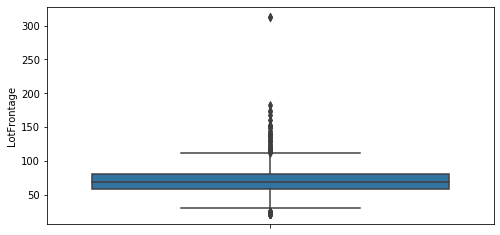

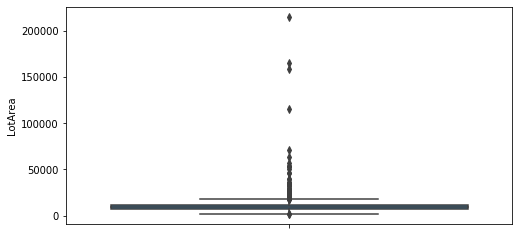

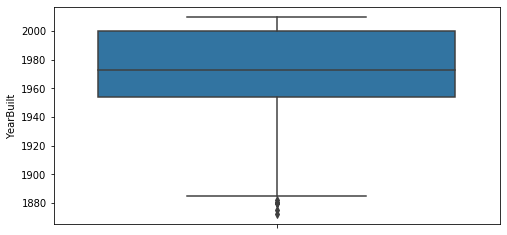

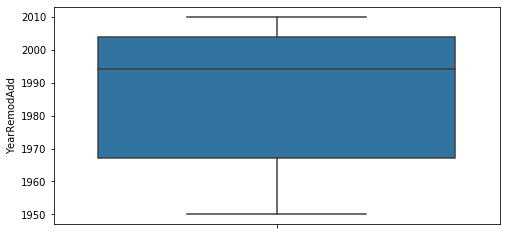

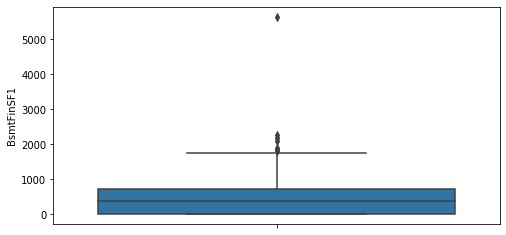

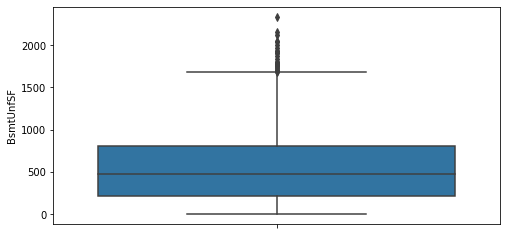

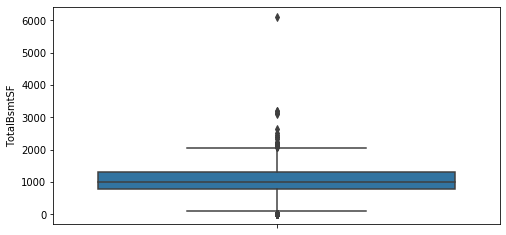

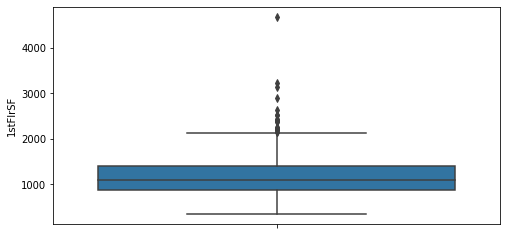

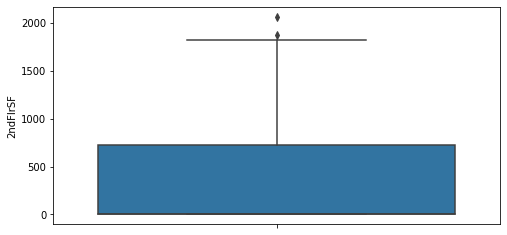

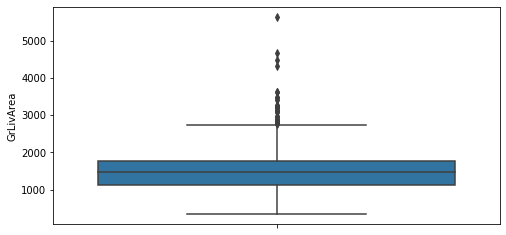

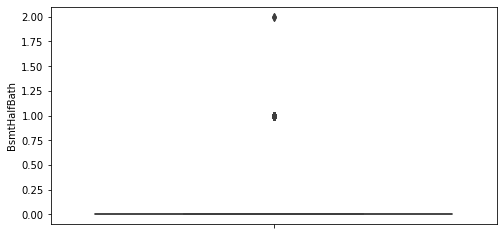

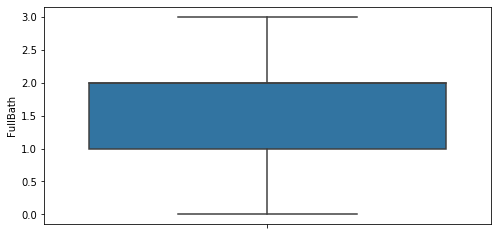

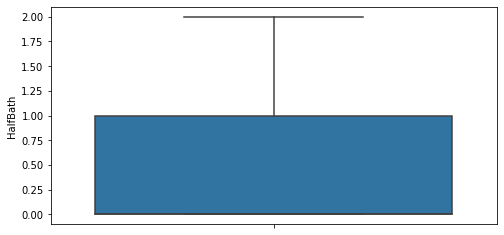

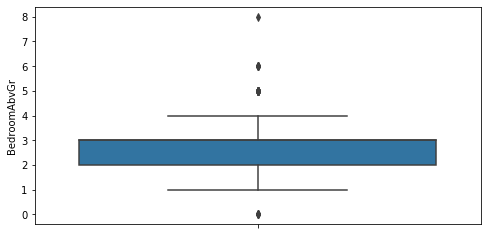

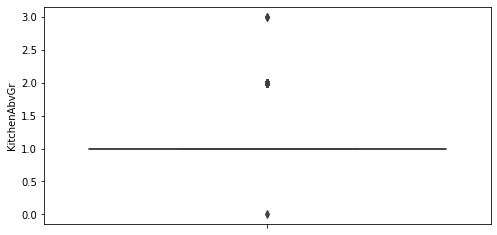

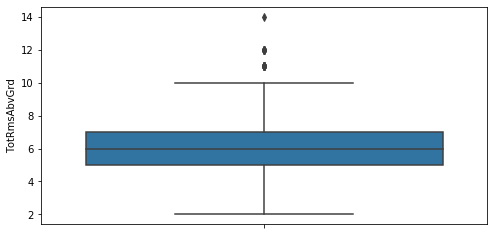

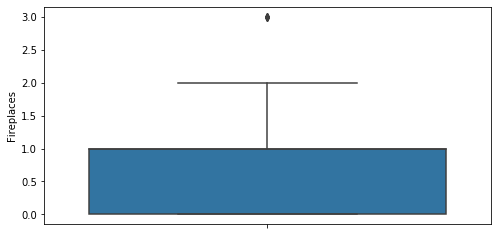

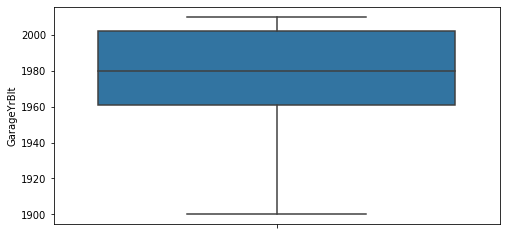

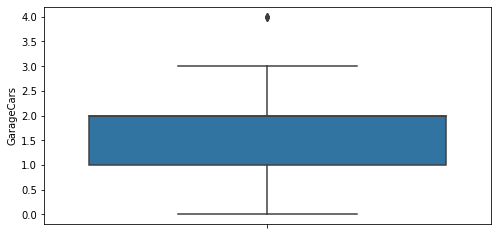

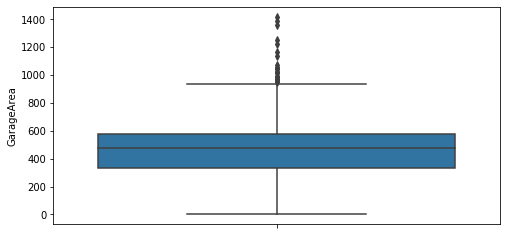

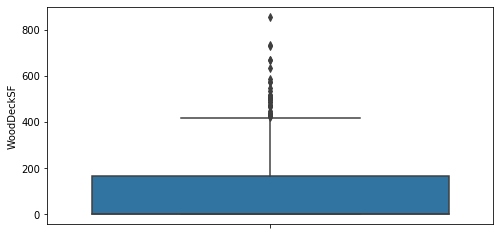

In [257]:
# plotting box chart between numeric columns and output column for outlier detection
for numeric_column in housing_input_data_numeric_columns:
    plt.figure(figsize=[8,4])
    sns.boxplot(y=housing_data[numeric_column])
    plt.show()

In [258]:
# From the box plot analysis, it is clear that below columns do show more outliers. Hence it is important to do 
# outlier removal for better quality of dataset
numeric_columns_having_outliers=['LotFrontage', 'LotArea',
       'GrLivArea']

In [259]:
housing_data.shape

(1460, 58)

In [260]:
# it was found from boxplot analysis that outliers are lying towards upper quartile.
# Hence, we only have to filter the points ab
higher_quartile = housing_data[numeric_columns_having_outliers].quantile(0.99)
print(higher_quartile)

LotFrontage      141.00
LotArea        37567.64
GrLivArea       3123.48
Name: 0.99, dtype: float64


In [261]:
housing_data.shape

(1460, 58)

Removing data above higher quatile range

In [262]:
for numeric_column in numeric_columns_having_outliers:
    housing_data = housing_data[ (housing_data[numeric_column] < higher_quartile[numeric_column])]

In [263]:
housing_data.shape

(1172, 58)

#### Correcting data types of columns and Handling missing values

##### Printing first 5 values to have an idea of the data for each column

In [264]:
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,2,548,TA,TA,Y,0,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,RFn,2,460,TA,TA,Y,298,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,2,608,TA,TA,Y,0,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Unf,3,642,TA,TA,Y,0,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,RFn,3,836,TA,TA,Y,192,WD,Normal,250000


**checking datatype for each column**

In [265]:
housing_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64


In [266]:
# find the columns which are having some null values
housing_data.columns[housing_data.isnull().sum()>0]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

Separating the columns into two set.
one set of categorical value and another set of numerical value

In [267]:
categorical_missing_values_columns=['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond']

numeric_missing_values_columns=['GarageYrBlt']

In [268]:
# printing the null count of each of these columns
housing_data[housing_data.columns[housing_data.isnull().sum()>0]].isnull().sum()

MasVnrType       6
BsmtQual        31
BsmtCond        31
BsmtExposure    32
BsmtFinType1    31
BsmtFinType2    32
Electrical       1
GarageType      72
GarageYrBlt     72
GarageFinish    72
GarageQual      72
GarageCond      72
dtype: int64

In [269]:
# imputing the missing values for categorical columns
for col in categorical_missing_values_columns:
    housing_data[col] = housing_data[col].fillna(housing_data[col].mode()[0])

In [270]:
# handling missing values of numeric column i.e. GarageYrBlt
for col in numeric_missing_values_columns:
    housing_data[col] = housing_data[col].fillna(housing_data[col].mean())


#housing_data['GarageYrBlt']=housing_data['GarageYrBlt'].fillna(housing_data['GarageYrBlt'].mean())


In [271]:
housing_data[housing_data.columns[housing_data.isnull().sum()>0]].isnull().sum()

Series([], dtype: float64)

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [272]:
# numerical column names are stores in housing_input_data_numeric_columns list
# categorical column names are stores in housing_input_data_categorical_columns list

In [273]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_data_categorical = housing_data[housing_input_data_categorical_columns]
housing_data_categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [274]:
# convert into dummies - one hot encoding
housing_input_data_dummies = pd.get_dummies(housing_data_categorical, drop_first=True)
housing_input_data_dummies.head()

,MSSubClass,OverallQual,OverallCond,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,7,5,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,20,6,8,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,60,7,5,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,70,7,5,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,60,8,5,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [275]:
# drop categorical variables 
housing_data = housing_data.drop(list(housing_data_categorical.columns), axis=1)

In [276]:
# concat dummy variables with X
housing_data = pd.concat([housing_data, housing_input_data_dummies], axis=1)

In [277]:
housing_data.shape

(1172, 198)

In [278]:
# split into train and test
from sklearn.model_selection import train_test_split
housing_data_train, housing_data_test = train_test_split(housing_data, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#### It is important to scale the features for linear regression, ridge regression and lasso regression

In [279]:
vars_for_scaling = ['LotFrontage', 'LotArea',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','SalePrice']

In [280]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [281]:
housing_data_train[vars_for_scaling] = scaler.fit_transform(housing_data_train[vars_for_scaling])

In [282]:
housing_data_test[vars_for_scaling] = scaler.transform(housing_data_test[vars_for_scaling])

In [283]:
y_train = housing_data_train.pop('SalePrice')
X_train = housing_data_train

In [284]:
y_test = housing_data_test.pop('SalePrice')
X_test = housing_data_test

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [285]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [286]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.20671787738395844
[ 1.21455655e-02  8.01564406e-02  5.82077416e-02  8.85900815e-03
  7.62423057e-02 -1.01035916e-02  1.06350425e-01  1.51820250e-01
  9.93595384e-02  1.30421600e-02 -1.27010583e-02  3.54661646e-02
  1.86114205e-02 -3.96348698e-02 -8.54270132e-02  6.76743403e-02
  1.09681364e-02  1.10398331e-02  4.24875486e-02  9.10193296e-03
  1.27464407e-02  1.04762556e-04  1.03945961e-02  1.02452361e-02
  7.22829051e-02  4.48389711e-02  4.92217302e-02  3.45742447e-02
  1.52520141e-02  7.18738397e-03  4.78222288e-03  1.36075558e-02
 -4.81603046e-02  2.04068027e-03  1.29734463e-02 -2.69660719e-02
 -3.33997757e-02 -1.46520683e-03  2.71707363e-03 -5.29525510e-02
  3.30090121e-02  4.35812015e-02  3.78313670e-02  5.20695001e-03
  3.47692204e-03  4.92854322e-02  3.77911130e-04 -1.23650576e-02
  2.90163152e-02  3.44222788e-02  5.59250018e-04  6.58223044e-03
  4.83010945e-02 -8.22085235e-04  5.72027430e-02  3.91495611e-02
  2.04904450e-02  1.82033355e-02  1.79052968e-02  8.12237388e-03
  9.

In [287]:
from sklearn.metrics import r2_score, mean_squared_error

In [288]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(" R sqaure value in train set is ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(" R sqaure value in test set is ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

 R sqaure value in train set is  0.9422905854634325
 R sqaure value in test set is  0.9103994375837129
0.883322496423878
0.4661993744054288
0.0010772225566144853
0.0013244300409245137


In [289]:
# From above results, it is clearly observed that linear regression model gives
#  R squared value on train set as 0.942 and 
# R squared value on test set as 0.91

## Ridge and Lasso Regression

Let's now try predicting sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [290]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [291]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [292]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.02203084  0.04741345  0.03125573  0.0108577   0.07020384  0.00278694
  0.05767839  0.0798169   0.03883687  0.07682402 -0.01478279  0.03523854
  0.02610074 -0.01145125 -0.0236203   0.04852917  0.01810886  0.00753395
  0.03061307  0.02133903  0.01623833 -0.00019966  0.01490695  0.00946463
  0.0254978   0.00023331  0.01542144  0.00705749  0.01204498  0.00245384
  0.00253361  0.01431674 -0.03071267  0.0047748   0.01842521 -0.02023294
 -0.01816283  0.00044545  0.00144415 -0.02628873 -0.00035209  0.00827023
  0.01134906 -0.01136629 -0.01012899  0.02454459 -0.01475376 -0.02342232
 -0.00373976  0.00013858 -0.0175615  -0.0115531   0.01098202 -0.01819496
  0.04169709  0.02777953 -0.00778067 -0.00637707 -0.00103534 -0.00701164
  0.00160569  0.05874063 -0.02237154  0.00916927  0.0092699   0.01607659
 -0.0005086  -0.00697344 -0.01822806  0.0090621   0.         -0.00308075
 -0.00078714 -0.01962128 -0.01399164 -0.00377281  0.00437395 -0.00092605
 -0.01755864 -0.01184042  0.00658204 -0.00084328  0

In [293]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(" R sqaure value in train set is ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(" R sqaure value in test set is ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

 R sqaure value in train set is  0.9364234408675748
 R sqaure value in test set is  0.9214649132366745
0.9731272683646659
0.40862476005265674
0.0011867405711764218
0.0011608657956041384


In [294]:
# From above results, it is clearly observed that ridge regression  model gives
#  R squared value on train set as 0.936 and 
# R squared value on test set as 0.921

## Lasso

In [295]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [296]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [297]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [298]:
lasso.coef_

array([ 0.01163985,  0.05792463,  0.05167058,  0.00898837,  0.07717438,
       -0.        ,  0.06136328,  0.1098032 ,  0.04583222,  0.08225793,
       -0.00893623,  0.02552767,  0.021969  , -0.01263189, -0.03103998,
        0.04081107,  0.01379836,  0.00690646,  0.03543454,  0.00469719,
        0.01112826, -0.00019532,  0.01354665,  0.01038034,  0.02203691,
       -0.        ,  0.00841188,  0.        ,  0.0027246 , -0.        ,
        0.00176209,  0.01187304, -0.0296386 ,  0.00390905,  0.01651933,
       -0.01627641, -0.00826407, -0.        , -0.        , -0.03204089,
        0.        ,  0.        ,  0.0161552 , -0.        , -0.        ,
        0.02876673, -0.00822535, -0.01546144,  0.        ,  0.        ,
       -0.01289869, -0.00562676,  0.00206092, -0.00967803,  0.05259095,
        0.0345336 , -0.        , -0.        ,  0.00079748, -0.        ,
        0.00680277,  0.07296968, -0.01252576,  0.00574315,  0.00685439,
        0.0132484 ,  0.        , -0.        , -0.0123477 ,  0.00

In [299]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(" R sqaure value in train set is ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(" R sqaure value in test set is ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

 R sqaure value in train set is  0.9346661804641628
 R sqaure value in test set is  0.926543295119605
1.0000245720173495
0.3822015056336231
0.0012195421609967677
0.0010857997319137019


In [300]:
# From above results, it is clearly observed that lasso regression  model gives
#  R squared value on train set as 0.9346 and 
# R squared value on test set as 0.9265



<h2> <strong> Ridge is giving slightly better test score that that of linear rigression and </strong> </h2>
<h2> <strong> Lasso is giving slightly better test score that that of ridge rigression.</strong> </h2>

In [301]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.942291,0.936423,0.934666
1,R2 Score (Test),0.910399,0.921465,0.926543
2,RSS (Train),0.883322,0.973127,1.000025
3,RSS (Test),0.466199,0.408625,0.382202
4,MSE (Train),0.032821,0.034449,0.034922
5,MSE (Test),0.036393,0.034071,0.032951


## Lets observe the changes in the coefficients after regularization

In [302]:
data = housing_data
y = data.pop('SalePrice')
X = data

In [303]:
betas = pd.DataFrame(index=X.columns)

In [304]:
betas.rows = X.columns

In [305]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [306]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
LotFrontage,1.214557e-02,0.022031,0.011640
LotArea,8.015644e-02,0.047413,0.057925
YearBuilt,5.820774e-02,0.031256,0.051671
YearRemodAdd,8.859008e-03,0.010858,0.008988
BsmtFinSF1,7.624231e-02,0.070204,0.077174
BsmtUnfSF,-1.010359e-02,0.002787,-0.000000
TotalBsmtSF,1.063504e-01,0.057678,0.061363
1stFlrSF,1.518202e-01,0.079817,0.109803
2ndFlrSF,9.935954e-02,0.038837,0.045832
GrLivArea,1.304216e-02,0.076824,0.082258
